## Problem Statement

**Lending is a critical function of banks, but there's a risk of customers defaulting or repaying loans early. Limited past data is available, but customer demographics, loan details, and EMI transactions provide high-dimensional data. We are supposed Unsupervised learning, like Principal Component Analysis, can reduce high dimensionality and identify patterns for further analysis.**

##### Collect and Explore Data

In [1]:
#Import the basic libraries to get started with EDA
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Read the data
df = pd.read_excel("Short+Term+Home+Loans.xlsx")

In [3]:
pd.set_option('display.max_columns', None) #This will help us show all the columns on case the data is too large

In [4]:
#Check the first few observations
df.head()

,loan_account,age,gender,marital_status,qualification,gross_income,nettakehome,balance_tenure,city,completed_tenure,current_interest_rate,current_interest_rate_max,current_interest_rate_min,current_tenor,diff_current_interest_rate_max_min,diff_emi_amount_max_min,diff_original_current_interest_rate,diff_original_current_tenor,emi_amount,emi_dueamt,emi_received_amt,excess_adjusted_amt,excess_available,foir,last_receipt_amount,loan_amt,max_emi_amount,min_emi_amount,monthopening,net_disbursed_amt,net_ltv,net_receivable,num_emi_changes,num_low_freq_transactions,num_of_emi_transactions,orignal_interest_rate,orignal_tenor,outstanding_principal,paid_interest,paid_principal,pre_emi_dueamt,pre_emi_received_amt
0,LA492,39,F,M,UG,63542.344735,63542.344735,111,MADURAI,70,17.479728,17.479728,17.479728,181,0.000000,11557.38,0.000000,-1,10654.0,1.647094e+06,1.647094e+06,1174.971750,1994.366627,0.34,10654.0,1201036.64,11600.0,42.62,9.882910e+05,1201036.64,36.62,-819.394878,11,10,73,17.479728,180,9.882910e+05,9.340537e+05,212745.625226,39959.331336,39959.331336
1,LA498,51,M,M,GRAD,81130.025032,81130.025032,107,MADURAI,68,14.982624,17.479728,14.982624,175,2.497104,13523.09,2.497104,5,12270.0,1.928366e+06,1.928366e+06,0.000000,2539.834800,0.42,12270.0,1501295.80,13603.0,79.91,1.206218e+06,1501295.80,38.82,-2539.834800,3,11,73,17.479728,180,1.206218e+06,1.069305e+06,295078.188194,78774.632736,78774.632736
2,LA500,41,M,M,UG,56298.592500,56298.592500,50,MADURAI,70,17.479728,17.479728,17.479728,120,0.000000,13608.59,0.000000,0,12422.0,1.920424e+06,1.900525e+06,3995.270568,3995.270568,0.33,12422.0,1201036.64,13650.0,41.41,7.137100e+05,1201036.64,32.18,19899.053520,13,10,73,17.479728,120,7.137100e+05,8.303592e+05,487326.621863,37918.629288,37918.629288
3,LA531,42,M,M,UG,74314.142100,74314.142100,110,MADURAI,70,17.479728,17.479728,17.479728,180,0.000000,38412.99,0.000000,0,18645.0,2.882492e+06,2.801637e+06,3713.459333,9403.815646,0.40,18645.0,2101814.12,38500.0,87.01,1.744746e+06,2101814.12,52.39,75164.732406,13,17,72,17.479728,180,1.744746e+06,1.567354e+06,357068.193072,29375.950152,29375.950152
4,LA552,27,M,S,GRAD,64255.460240,64255.460240,112,MADURAI,69,17.479728,17.479728,17.479728,181,0.000000,32346.11,0.000000,-1,15981.0,2.435346e+06,2.389370e+06,41280.641741,41280.641741,0.37,16000.0,1801554.96,33200.0,853.89,1.502039e+06,1801554.96,41.35,45976.001208,14,10,71,17.479728,180,1.502039e+06,1.355995e+06,299516.018579,46048.309200,46048.309200


In [5]:
df.shape

(2319, 42)

In [6]:
round(df.describe(), 2)

,age,gross_income,nettakehome,balance_tenure,completed_tenure,current_interest_rate,current_interest_rate_max,current_interest_rate_min,current_tenor,diff_current_interest_rate_max_min,diff_emi_amount_max_min,diff_original_current_interest_rate,diff_original_current_tenor,emi_amount,emi_dueamt,emi_received_amt,excess_adjusted_amt,excess_available,foir,last_receipt_amount,loan_amt,max_emi_amount,min_emi_amount,monthopening,net_disbursed_amt,net_ltv,net_receivable,num_emi_changes,num_low_freq_transactions,num_of_emi_transactions,orignal_interest_rate,orignal_tenor,outstanding_principal,paid_interest,paid_principal,pre_emi_dueamt,pre_emi_received_amt
count,2319.00,2319.00,2319.00,2319.00,2319.00,2319.00,2319.00,2319.00,2319.00,2319.00,2319.00,2319.00,2319.00,2319.00,2319.00,2319.00,2319.00,2319.00,2319.00,2319.00,2319.00,2319.00,2319.00,2319.00,2319.00,2319.00,2319.00,2319.00,2319.00,2319.00,2319.00,2319.00,2319.00,2319.00,2319.00,2319.00,2319.00
mean,39.45,82608.22,81346.19,146.66,29.50,15.70,15.78,15.68,175.97,0.10,56355.89,0.07,4.90,18012.02,1191197.19,1132347.23,131992.76,186546.88,0.43,41143.52,2194990.71,58074.97,1723.59,2035442.15,2189516.95,51.57,4978.29,5.36,4.57,32.16,15.77,180.87,1949441.67,653897.75,238949.43,56303.30,55620.86
std,8.98,126400.67,126845.95,45.14,13.49,1.87,1.83,1.88,42.24,0.56,195904.54,0.48,23.37,12373.18,1064386.67,980094.49,586710.28,717516.89,0.15,174883.49,1349637.01,196022.08,5332.76,1286849.15,1349531.10,18.76,525767.14,3.81,3.61,13.25,1.81,35.86,1289269.35,555335.63,454681.37,117621.85,115597.90
min,18.00,0.00,0.00,0.00,0.00,11.07,11.07,11.07,10.00,0.00,0.00,-1.25,-94.00,14.37,0.00,0.00,0.00,0.00,0.00,2.00,175651.61,562.00,0.09,151435.71,175651.61,5.22,-7133501.93,0.00,0.00,0.00,11.07,60.00,0.00,0.00,0.00,0.00,0.00
25%,32.00,41895.91,41099.47,129.00,22.00,14.05,14.36,14.05,173.00,0.00,10298.50,0.00,0.00,9727.00,551701.81,532592.31,0.00,0.00,0.34,9316.00,1238569.03,11573.00,115.00,1135779.82,1231062.56,36.80,-325.99,3.00,2.00,24.00,14.36,180.00,1065798.41,308366.91,64636.79,5852.66,5848.25
50%,39.00,61849.63,60502.22,150.00,28.00,15.92,15.92,15.92,180.00,0.00,17350.00,0.00,0.00,14650.00,893688.36,866289.06,0.00,172.71,0.42,14405.00,1801554.96,18975.00,115.00,1688189.11,1801554.96,52.07,-0.44,4.00,3.00,31.00,15.92,180.00,1606862.42,508238.17,115927.06,16871.13,16871.13
75%,46.00,91189.46,90464.02,167.00,37.00,17.48,17.48,17.48,181.00,0.00,28604.78,0.00,0.00,22640.00,1453225.01,1397185.21,1091.12,3881.75,0.49,23077.00,2818682.86,29676.50,573.00,2620309.14,2800198.91,68.89,0.00,7.00,6.00,40.00,17.48,180.00,2546080.58,806710.04,220885.65,54235.41,54235.41
max,65.00,4261663.83,4261663.83,307.00,70.00,19.98,19.98,19.98,316.00,12.01,3229383.00,5.62,228.00,120000.00,9853225.06,9853225.06,10202631.46,10219526.88,1.00,3229945.00,10893657.55,3229945.00,84001.00,10802417.79,10893657.55,84.39,8252080.07,27.00,21.00,73.00,19.98,240.00,10802417.79,5588190.79,7458321.93,1624202.27,1585700.58


In [7]:
df.select_dtypes(include = 'object')

,loan_account,gender,marital_status,qualification,city
0,LA492,F,M,UG,MADURAI
1,LA498,M,M,GRAD,MADURAI
2,LA500,M,M,UG,MADURAI
3,LA531,M,M,UG,MADURAI
4,LA552,M,S,GRAD,MADURAI
...,...,...,...,...,...
2314,LA5725,M,M,UG,MUMBAI
2315,LA5726,M,M,UG,MUMBAI
2316,LA5727,M,M,UG,SURAT
2317,LA5732,M,M,UG,AHMEDABAD


In [8]:
#Check the appropriateness of datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2319 entries, 0 to 2318
Data columns (total 42 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   loan_account                         2319 non-null   object 
 1   age                                  2319 non-null   int64  
 2   gender                               2319 non-null   object 
 3   marital_status                       2319 non-null   object 
 4   qualification                        2319 non-null   object 
 5   gross_income                         2319 non-null   float64
 6   nettakehome                          2319 non-null   float64
 7   balance_tenure                       2319 non-null   int64  
 8   city                                 2319 non-null   object 
 9   completed_tenure                     2319 non-null   int64  
 10  current_interest_rate                2319 non-null   float64
 11  current_interest_rate_max     

In [9]:
#Check for presence of duplicate rows
df.duplicated().sum()

0

In [10]:
#Check for presence of missing values in each feature
df.isnull().sum()

loan_account                           0
age                                    0
gender                                 0
marital_status                         0
qualification                          0
gross_income                           0
nettakehome                            0
balance_tenure                         0
city                                   0
completed_tenure                       0
current_interest_rate                  0
current_interest_rate_max              0
current_interest_rate_min              0
current_tenor                          0
diff_current_interest_rate_max_min     0
diff_emi_amount_max_min                0
diff_original_current_interest_rate    0
diff_original_current_tenor            0
emi_amount                             0
emi_dueamt                             0
emi_received_amt                       0
excess_adjusted_amt                    0
excess_available                       0
foir                                   0
last_receipt_amo

In [11]:
df.select_dtypes(include = 'object').columns

Index(['loan_account', 'gender', 'marital_status', 'qualification', 'city'], dtype='object')

In [12]:
for cols in df.select_dtypes(include = 'object').columns:
    if cols not in ['loan_account']:
        print(df[cols].value_counts())
        print('\n') #We have skipped to check the value count for Loan Account, as that seems to be distinct for each customer loan account

M    1994
F     325
Name: gender, dtype: int64


M    2086
S     233
Name: marital_status, dtype: int64


UG          1548
GRAD         409
POSTGRAD     181
OTHERS       150
PRF           18
ENG            6
MAT            5
DOCTRATE       2
Name: qualification, dtype: int64


MUMBAI             586
HYDERABAD          268
AHMEDABAD          165
CHENNAI            164
MADURAI            157
COIMBATORE         156
SURAT              136
ERODE               85
TIRUCHIRAPPALLI     78
PUNE                78
KARUR               65
TUTICORIN           64
TIRUPUR             63
WARANGAL            56
NAMAKKAL            56
BANGALORE           45
VISHAKHAPATNAM      45
Hyd                 31
Mum                 21
Name: city, dtype: int64




**We can see there is some discrepancy in the data here, we will have to treat them before we proceed further. We will Change Hyd to HYDERABAD and Mum to Mumbai**

##### Data Cleaning

In [13]:
df['city'] = np.where(df['city'] == 'Hyd', 'HYDERABAD', df['city'])
df['city'] = np.where(df['city'] == 'Mum', 'MUMBAI', df['city'])

In [14]:
for cols in df.select_dtypes(include = 'object').columns:
    if cols not in ['loan_account']:
        print(df[cols].value_counts())
        print('\n')

M    1994
F     325
Name: gender, dtype: int64


M    2086
S     233
Name: marital_status, dtype: int64


UG          1548
GRAD         409
POSTGRAD     181
OTHERS       150
PRF           18
ENG            6
MAT            5
DOCTRATE       2
Name: qualification, dtype: int64


MUMBAI             607
HYDERABAD          299
AHMEDABAD          165
CHENNAI            164
MADURAI            157
COIMBATORE         156
SURAT              136
ERODE               85
TIRUCHIRAPPALLI     78
PUNE                78
KARUR               65
TUTICORIN           64
TIRUPUR             63
NAMAKKAL            56
WARANGAL            56
BANGALORE           45
VISHAKHAPATNAM      45
Name: city, dtype: int64




### Observation

###### 1. The age varies from minimum of 18 to maximum of 65, the column seems good to go.
###### 2. The diff_current_interest_rate_max_min, diff_original_current_interest_rate, diff_original_current_tenor for around 75% of the population  is 0
###### 3. The excess_adjusted_amt and excess_available if 0 for 50 % and 25% of the population recpectively. 
###### 4. gross_income and nettakehome has values equal to 0, which needs to be treated. 
###### 5. We have 5 object type 'loan_account', 'gender', 'marital_status', 'qualification', 'city'. The 'city' has been cleaned.
###### 6. The population mostly constitutes of Mumbai City, population. Most of the people are male in the population. We can refer to the above Countplot for better vizualization..

In [15]:
# calculate percentage of 0 values in each column
zero_perc = (df.select_dtypes(include=['int', 'float']).isin([0]).sum() / df.select_dtypes(include=['int', 'float']).shape[0]) * 100

# display results
print(zero_perc)

age                                     0.000000
gross_income                            0.215610
nettakehome                             0.991807
balance_tenure                          0.086244
completed_tenure                        2.069858
current_interest_rate                   0.000000
current_interest_rate_max               0.000000
current_interest_rate_min               0.000000
current_tenor                           0.000000
diff_current_interest_rate_max_min     95.299698
diff_emi_amount_max_min                 1.638637
diff_original_current_interest_rate    96.032773
diff_original_current_tenor            72.488141
emi_amount                              0.000000
emi_dueamt                              2.069858
emi_received_amt                        2.199224
excess_adjusted_amt                    67.960328
excess_available                       25.959465
foir                                    0.344976
last_receipt_amount                     0.000000
loan_amt            

In [16]:
df.duplicated().sum() #We will  now check if there are any duplicate entries in the dataset. 

0

C:\Users\NikhilSingh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='gross_income'>

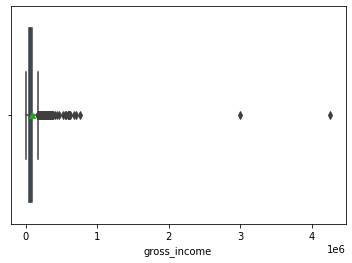

In [17]:
sns.boxplot(df['gross_income'], showmeans = True)

C:\Users\NikhilSingh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='nettakehome'>

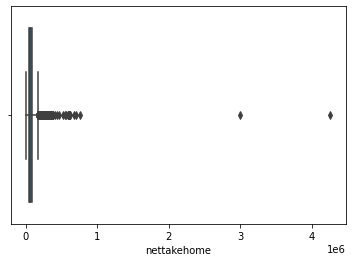

In [18]:
sns.boxplot(df['nettakehome'])

**While we were checking the percentage of zero, we have also observed that gross income and net income also contain zero values, which seems to be a bit suspicious because people without any income will not be present in the data is it. So we will be imputing though zero values with median or the mean here we will be taking the median since we are able to observe several outliers in the data column**

**We will also be dropping four columns which have a zero percentage of more than 67%, they might not be contribute significantly to the algorithm so we should consider dropping them**

In [19]:
df.drop(['diff_current_interest_rate_max_min','diff_original_current_interest_rate','diff_original_current_tenor','excess_adjusted_amt'], axis=1, inplace=True)

In [20]:
num_var = df.select_dtypes(exclude = 'object')

In [21]:
import warnings
warnings.filterwarnings("ignore")

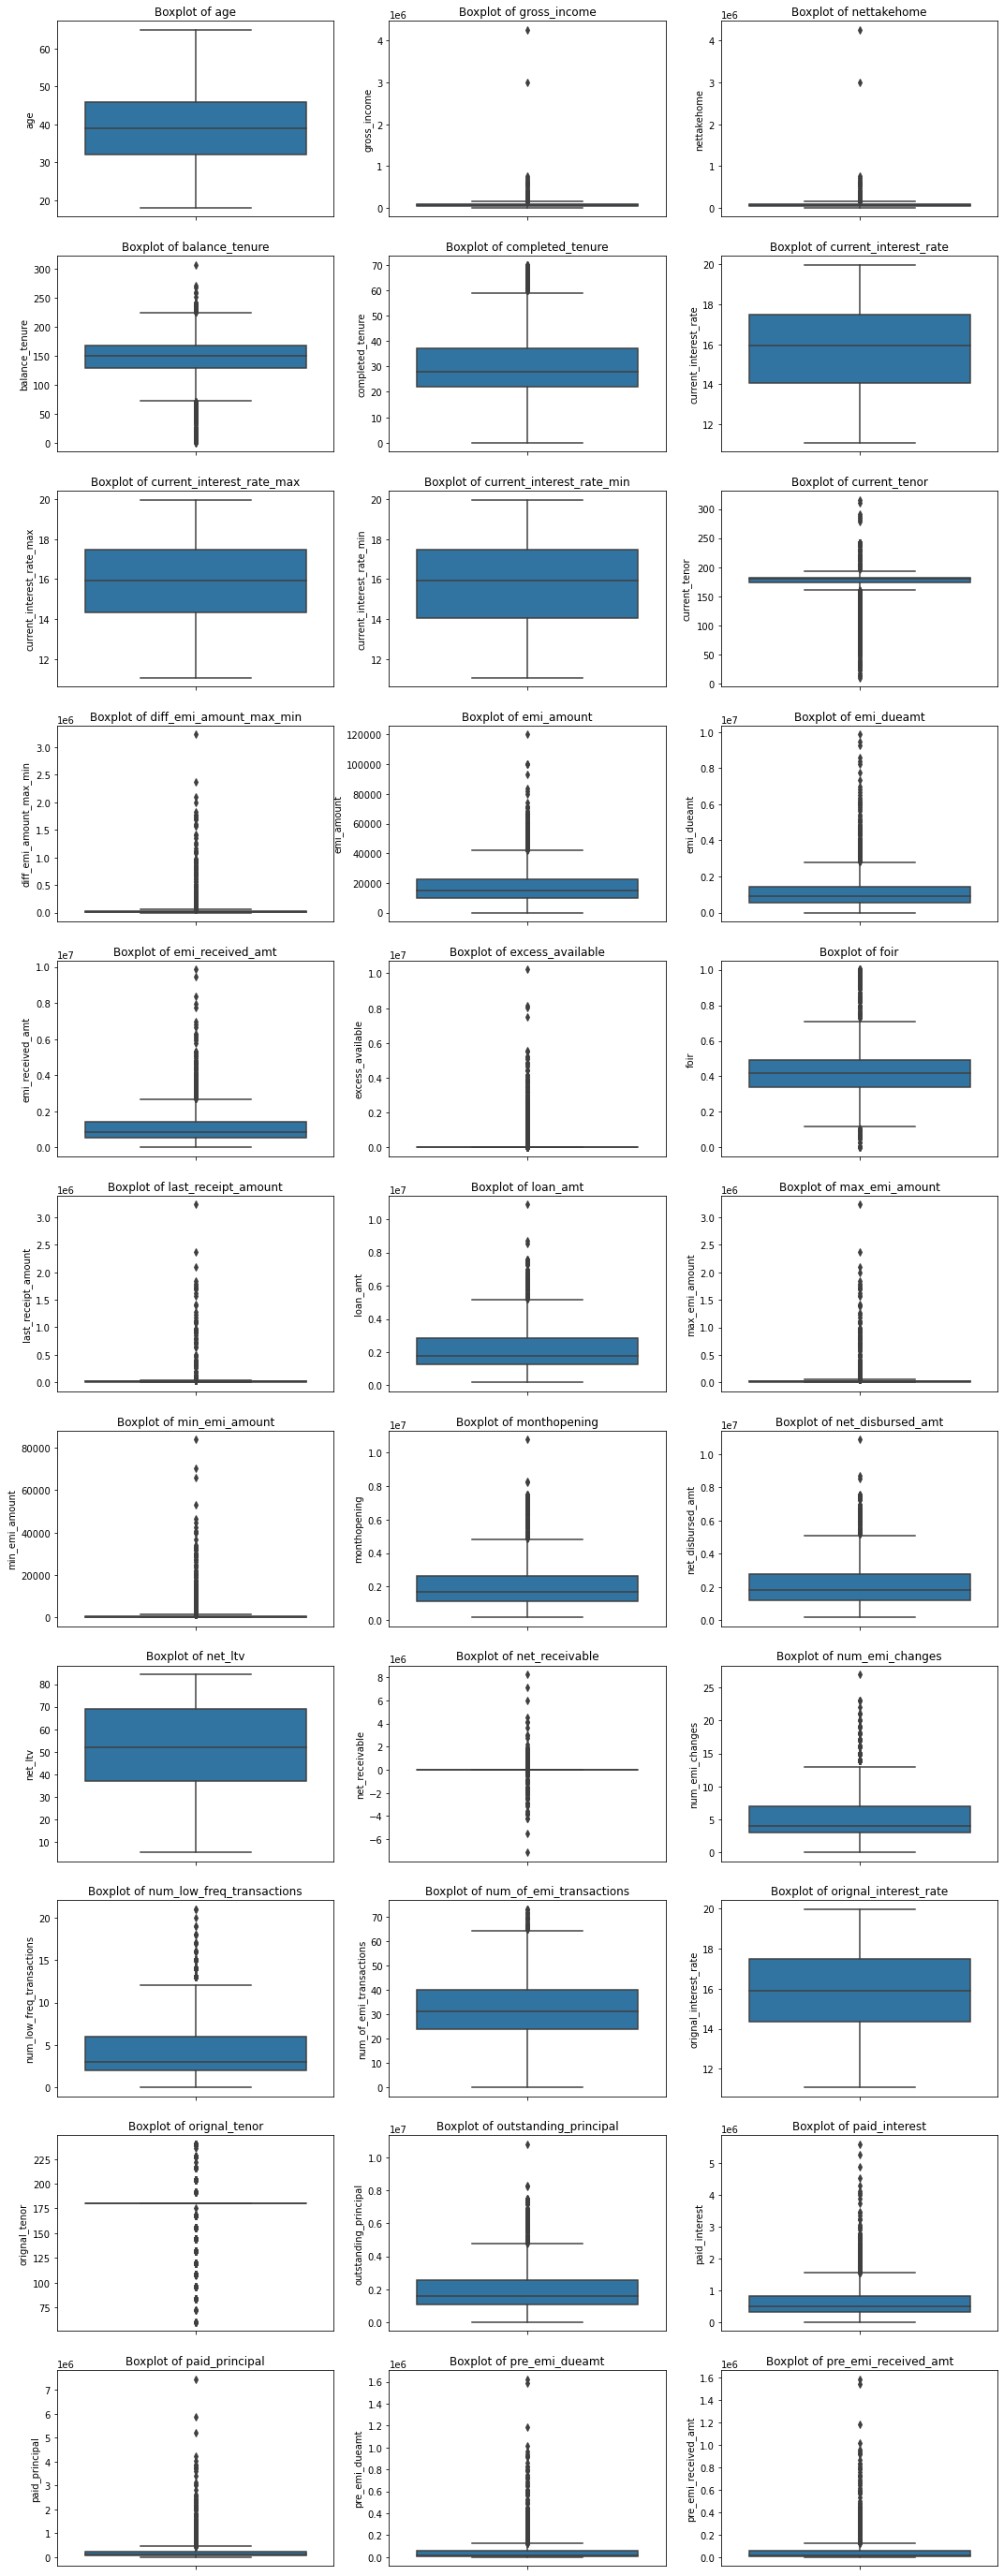

In [22]:
plt.figure(figsize = (18,50))
feature_list = num_var.columns
for i in range(len(feature_list)):
    plt.subplot(11, 3, i + 1)
    sns.boxplot(y = num_var[feature_list[i]], data = num_var)
    plt.title('Boxplot of {}'.format(feature_list[i]))

In [23]:
from scipy.stats import norm

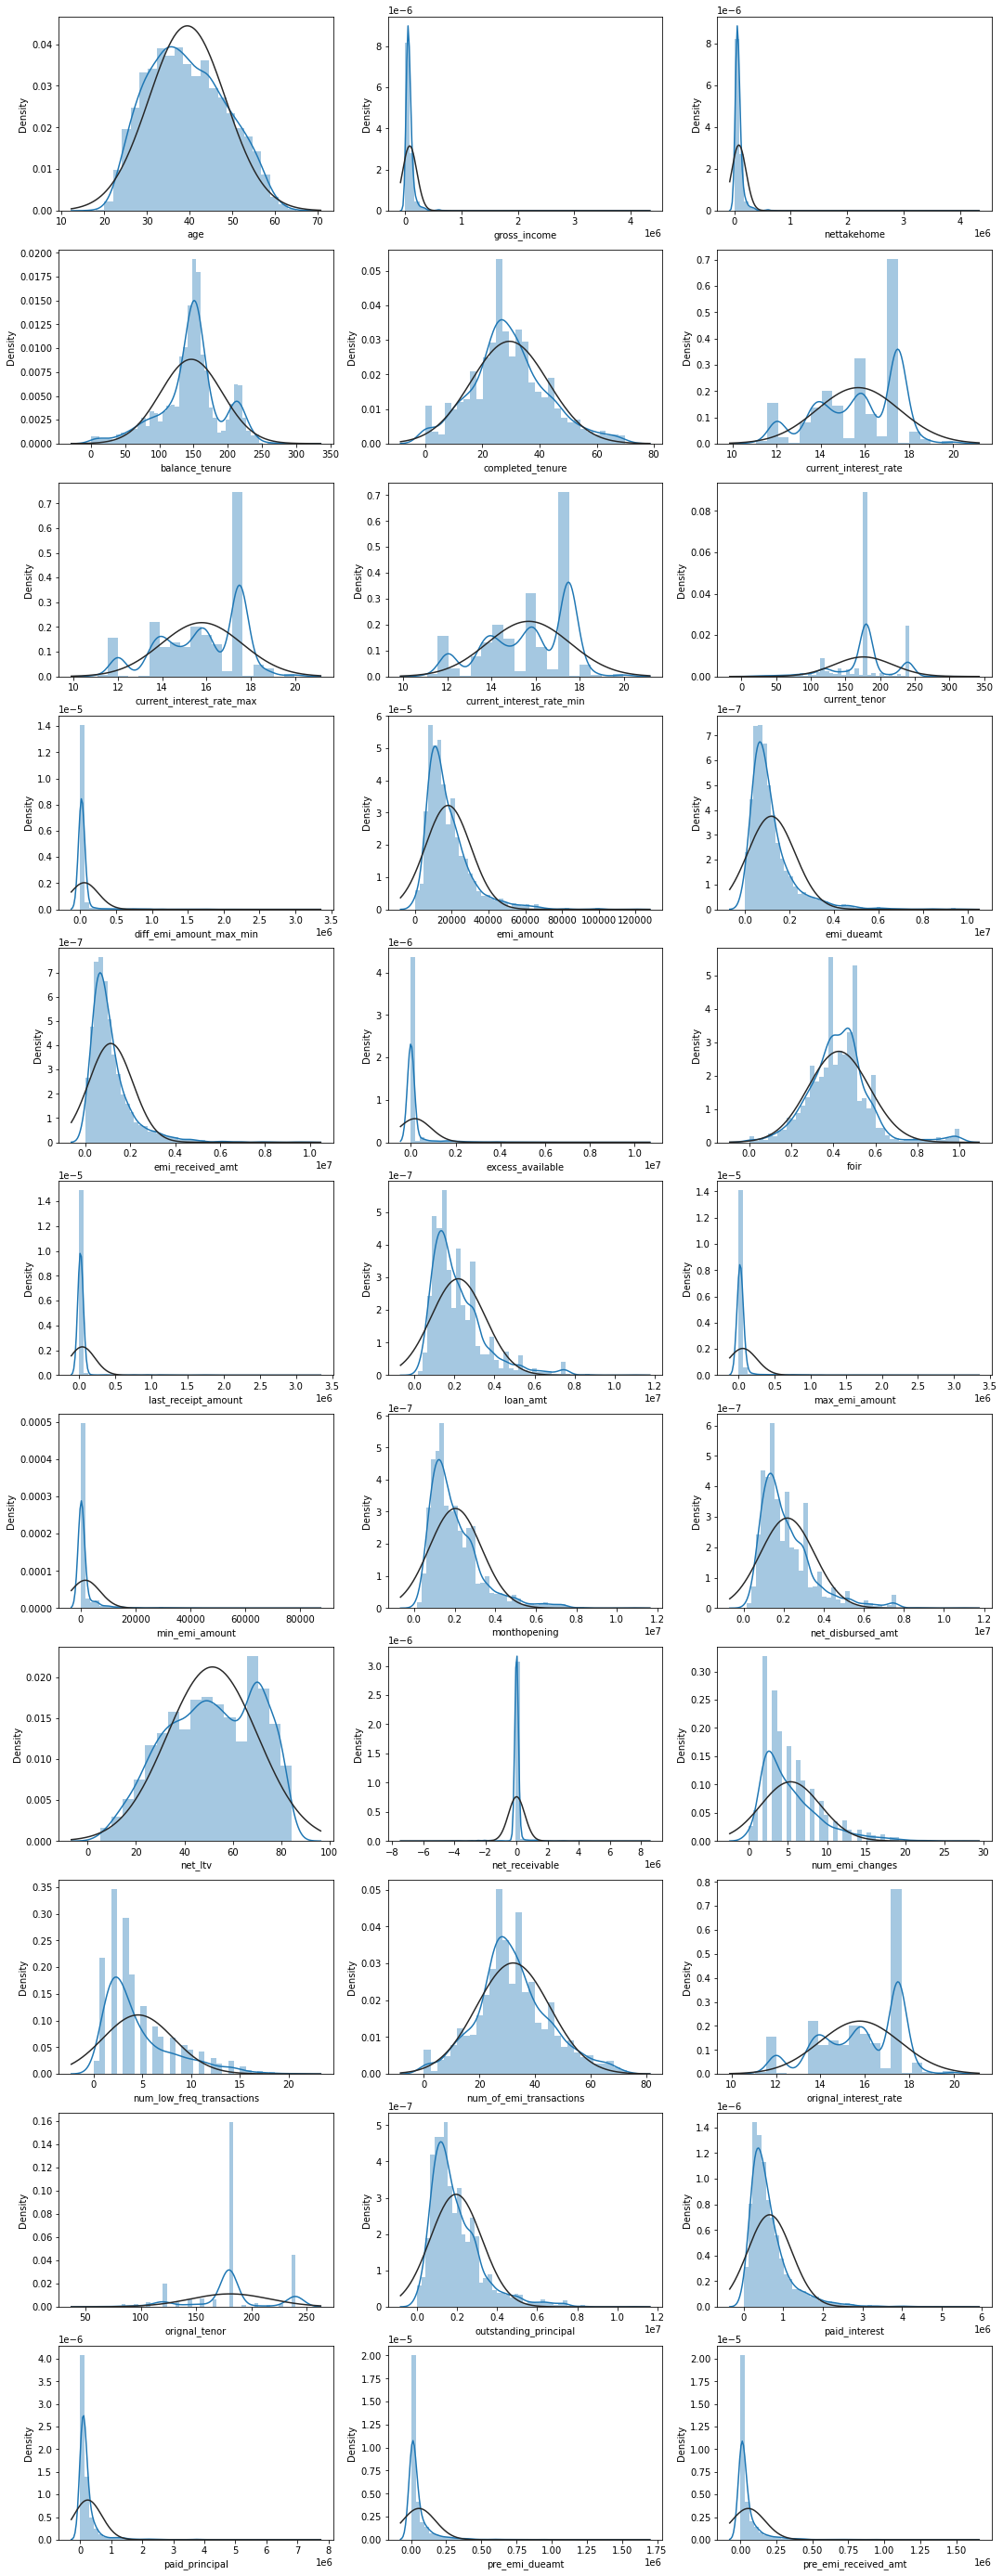

In [24]:
plt.figure(figsize = (18,50))
feature_list = num_var.columns
for i in range(len(feature_list)):
    plt.subplot(11, 3, i + 1)
    sns.distplot(num_var[feature_list[i]], fit=norm)

In [25]:
for col in num_var.columns:
    print(col)
    print(round(num_var[col].describe(), 2))
    print('\n')

age
count    2319.00
mean       39.45
std         8.98
min        18.00
25%        32.00
50%        39.00
75%        46.00
max        65.00
Name: age, dtype: float64


gross_income
count       2319.00
mean       82608.22
std       126400.67
min            0.00
25%        41895.91
50%        61849.63
75%        91189.46
max      4261663.83
Name: gross_income, dtype: float64


nettakehome
count       2319.00
mean       81346.19
std       126845.95
min            0.00
25%        41099.47
50%        60502.22
75%        90464.02
max      4261663.83
Name: nettakehome, dtype: float64


balance_tenure
count    2319.00
mean      146.66
std        45.14
min         0.00
25%       129.00
50%       150.00
75%       167.00
max       307.00
Name: balance_tenure, dtype: float64


completed_tenure
count    2319.00
mean       29.50
std        13.49
min         0.00
25%        22.00
50%        28.00
75%        37.00
max        70.00
Name: completed_tenure, dtype: float64


current_interest_rate
count   

In [26]:
df.gross_income.replace(to_replace=0, value=df.gross_income.median(),inplace=True)
df.nettakehome.replace(to_replace=0, value=df.nettakehome.median(),inplace=True)

In [27]:
df

,loan_account,age,gender,marital_status,qualification,gross_income,nettakehome,balance_tenure,city,completed_tenure,current_interest_rate,current_interest_rate_max,current_interest_rate_min,current_tenor,diff_emi_amount_max_min,emi_amount,emi_dueamt,emi_received_amt,excess_available,foir,last_receipt_amount,loan_amt,max_emi_amount,min_emi_amount,monthopening,net_disbursed_amt,net_ltv,net_receivable,num_emi_changes,num_low_freq_transactions,num_of_emi_transactions,orignal_interest_rate,orignal_tenor,outstanding_principal,paid_interest,paid_principal,pre_emi_dueamt,pre_emi_received_amt
0,LA492,39,F,M,UG,63542.344735,63542.344735,111,MADURAI,70,17.479728,17.479728,17.479728,181,11557.38,10654.0,1.647094e+06,1.647094e+06,1994.366627,0.34,10654.0,1.201037e+06,11600.0,42.62,9.882910e+05,1.201037e+06,36.62,-819.394878,11,10,73,17.479728,180,9.882910e+05,9.340537e+05,212745.625226,39959.331336,39959.331336
1,LA498,51,M,M,GRAD,81130.025032,81130.025032,107,MADURAI,68,14.982624,17.479728,14.982624,175,13523.09,12270.0,1.928366e+06,1.928366e+06,2539.834800,0.42,12270.0,1.501296e+06,13603.0,79.91,1.206218e+06,1.501296e+06,38.82,-2539.834800,3,11,73,17.479728,180,1.206218e+06,1.069305e+06,295078.188194,78774.632736,78774.632736
2,LA500,41,M,M,UG,56298.592500,56298.592500,50,MADURAI,70,17.479728,17.479728,17.479728,120,13608.59,12422.0,1.920424e+06,1.900525e+06,3995.270568,0.33,12422.0,1.201037e+06,13650.0,41.41,7.137100e+05,1.201037e+06,32.18,19899.053520,13,10,73,17.479728,120,7.137100e+05,8.303592e+05,487326.621863,37918.629288,37918.629288
3,LA531,42,M,M,UG,74314.142100,74314.142100,110,MADURAI,70,17.479728,17.479728,17.479728,180,38412.99,18645.0,2.882492e+06,2.801637e+06,9403.815646,0.40,18645.0,2.101814e+06,38500.0,87.01,1.744746e+06,2.101814e+06,52.39,75164.732406,13,17,72,17.479728,180,1.744746e+06,1.567354e+06,357068.193072,29375.950152,29375.950152
4,LA552,27,M,S,GRAD,64255.460240,64255.460240,112,MADURAI,69,17.479728,17.479728,17.479728,181,32346.11,15981.0,2.435346e+06,2.389370e+06,41280.641741,0.37,16000.0,1.801555e+06,33200.0,853.89,1.502039e+06,1.801555e+06,41.35,45976.001208,14,10,71,17.479728,180,1.502039e+06,1.355995e+06,299516.018579,46048.309200,46048.309200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2314,LA5725,61,M,M,UG,52545.353000,52545.353000,63,MUMBAI,21,16.168748,16.168748,16.168748,84,9885.00,9991.0,4.633785e+05,4.633785e+05,19.876968,0.28,9991.0,8.257127e+05,10000.0,115.00,6.830776e+05,8.257127e+05,72.39,-19.876968,3,2,22,16.168748,84,6.830776e+05,1.738395e+05,142635.111366,2186.466480,2186.466480
2315,LA5726,34,M,M,UG,61849.633721,60502.220740,240,MUMBAI,0,14.358348,14.358348,14.358348,240,24485.00,8300.0,0.000000e+00,0.000000e+00,0.000000,0.92,8300.0,1.498676e+06,24600.0,115.00,1.280237e+06,1.280237e+06,66.77,124007.986248,7,8,18,14.358348,240,1.280237e+06,1.305872e+05,0.000000,316114.464864,192106.478616
2316,LA5727,23,M,M,UG,36780.501024,36780.501024,159,SURAT,21,15.606900,15.606900,15.606900,180,9385.00,9491.0,4.401887e+05,4.401887e+05,0.000000,0.38,9491.0,1.155998e+06,9500.0,115.00,1.104503e+06,1.155998e+06,79.67,0.000000,3,3,22,15.606900,180,1.104503e+06,2.501399e+05,51494.445940,3544.725960,3544.725960
2317,LA5732,52,M,M,UG,76566.085800,76566.085800,159,AHMEDABAD,21,14.982624,14.982624,14.982624,180,24285.00,12200.0,5.649962e+05,5.112665e+05,39.753936,0.54,12200.0,1.523815e+06,24400.0,115.00,1.460345e+06,1.523815e+06,79.65,53689.899120,4,5,22,14.982624,180,1.460345e+06,2.866109e+05,63470.282537,3736.869984,3736.869984


In [28]:
cat_var = df.select_dtypes(include='object')

In [29]:
cat_var

,loan_account,gender,marital_status,qualification,city
0,LA492,F,M,UG,MADURAI
1,LA498,M,M,GRAD,MADURAI
2,LA500,M,M,UG,MADURAI
3,LA531,M,M,UG,MADURAI
4,LA552,M,S,GRAD,MADURAI
...,...,...,...,...,...
2314,LA5725,M,M,UG,MUMBAI
2315,LA5726,M,M,UG,MUMBAI
2316,LA5727,M,M,UG,SURAT
2317,LA5732,M,M,UG,AHMEDABAD


In [30]:
cat_var.drop('loan_account', inplace = True, axis = 1)

In [31]:
cat_var

,gender,marital_status,qualification,city
0,F,M,UG,MADURAI
1,M,M,GRAD,MADURAI
2,M,M,UG,MADURAI
3,M,M,UG,MADURAI
4,M,S,GRAD,MADURAI
...,...,...,...,...
2314,M,M,UG,MUMBAI
2315,M,M,UG,MUMBAI
2316,M,M,UG,SURAT
2317,M,M,UG,AHMEDABAD


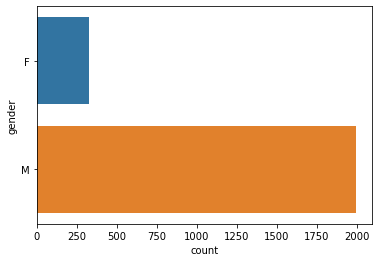

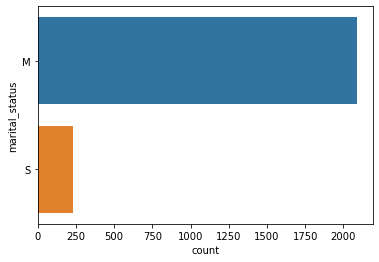

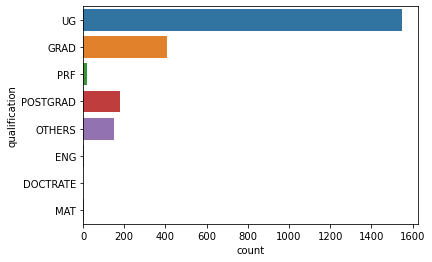

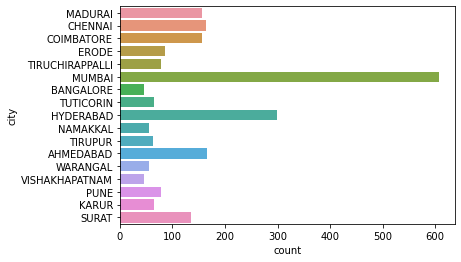

In [32]:
for cols in cat_var.columns:
    sns.countplot(y = cat_var[cols])
    plt.show()

### Observation

###### 1. The most of the populating in the dataset are male. Most of the population belongs to Mumbai and followed by Hyderabad.
###### 2. The Eng, Doctrate and MAT have negligible number of entries in the dataset.
###### 3. The population constitutes of married people in the dataset. 

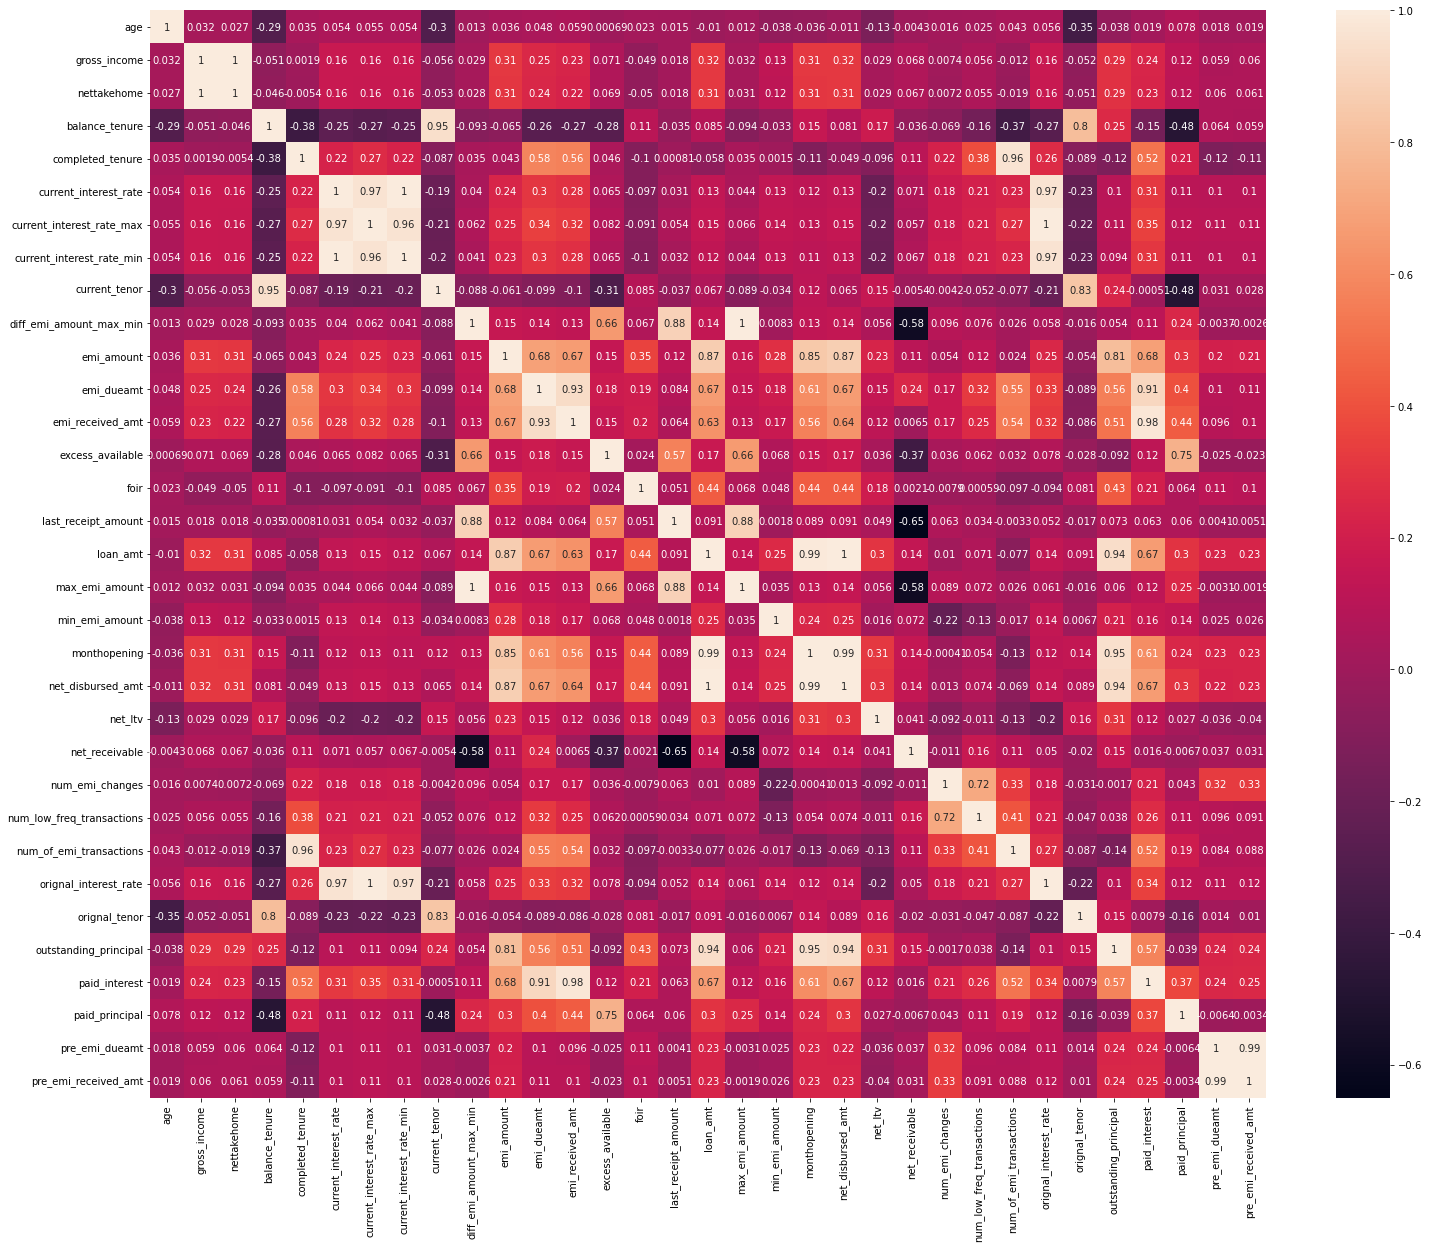

In [33]:
plt.figure(figsize = (25,20))
sns.heatmap(num_var.corr(), annot = True);

**We are able to see high corelation between variables. **

In [34]:
num_var['foir'].min()

0.0

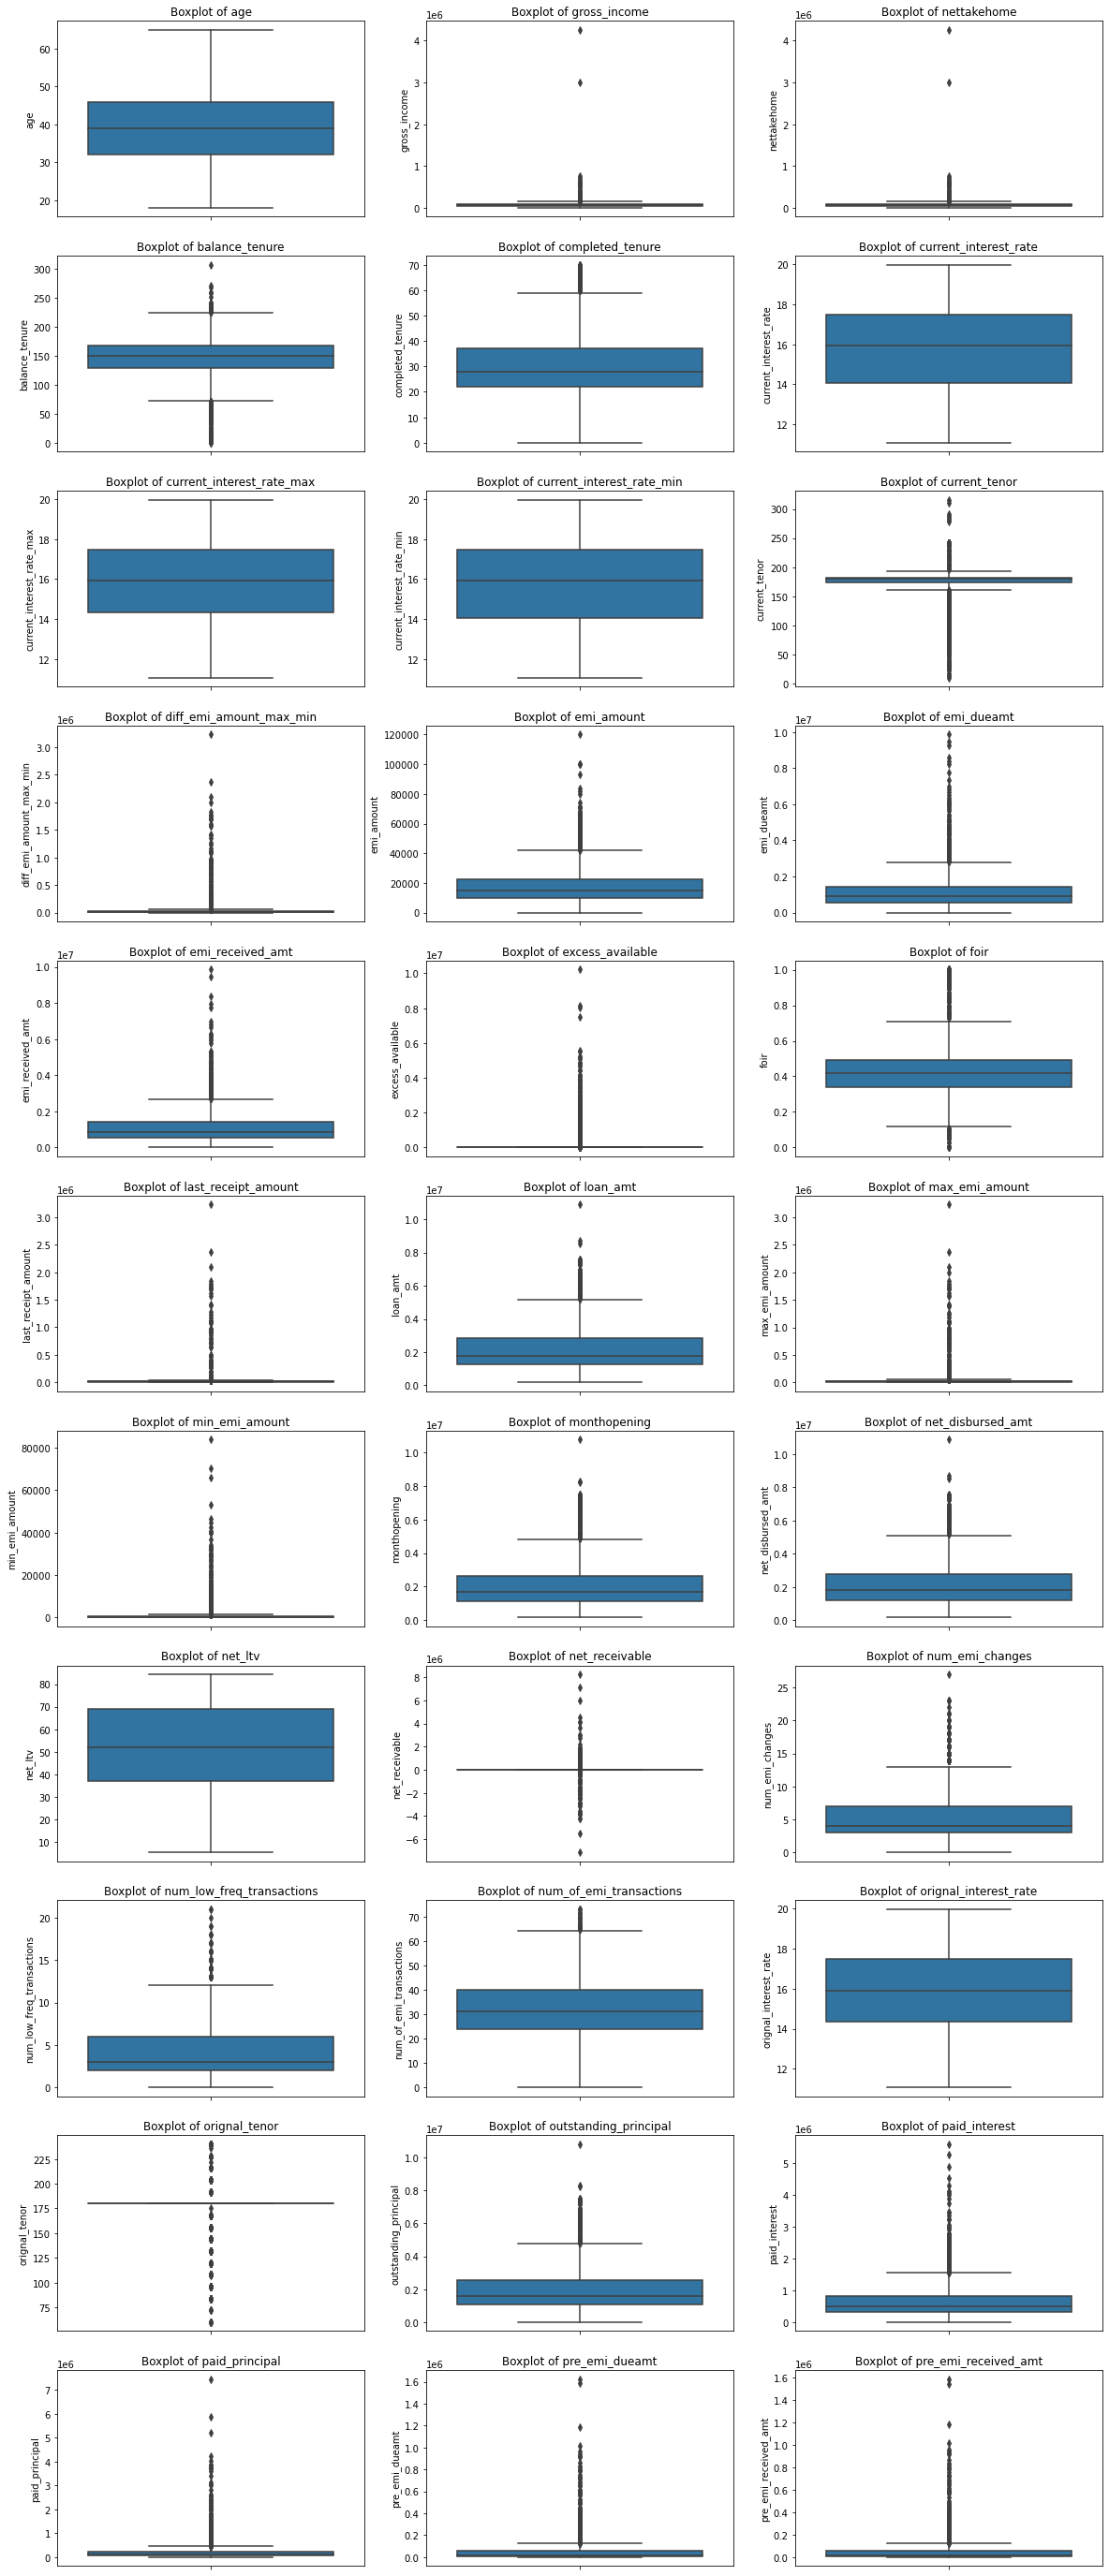

In [35]:
#Check for presence of outliers in each feature
plt.figure(figsize = (20,50))
feature_list = num_var.columns
for i in range(len(feature_list)):
    plt.subplot(11, 3, i + 1)
    sns.boxplot(y = num_var[feature_list[i]], data = num_var)
    plt.title('Boxplot of {}'.format(feature_list[i]))

**As we can see in the above boxplot, 'age', 'completed_tenure', 'current_interest_rate', 'current_interest_rate_max', 'current_interest_rate_min', 'net_ltv', 'orignal_interest_rate',  there are no outliers present in these columns of the dataset**

**We might not be required to treat them**

In [36]:
num_var.columns #Just to refre to the column names.

Index(['age', 'gross_income', 'nettakehome', 'balance_tenure',
       'completed_tenure', 'current_interest_rate',
       'current_interest_rate_max', 'current_interest_rate_min',
       'current_tenor', 'diff_emi_amount_max_min', 'emi_amount', 'emi_dueamt',
       'emi_received_amt', 'excess_available', 'foir', 'last_receipt_amount',
       'loan_amt', 'max_emi_amount', 'min_emi_amount', 'monthopening',
       'net_disbursed_amt', 'net_ltv', 'net_receivable', 'num_emi_changes',
       'num_low_freq_transactions', 'num_of_emi_transactions',
       'orignal_interest_rate', 'orignal_tenor', 'outstanding_principal',
       'paid_interest', 'paid_principal', 'pre_emi_dueamt',
       'pre_emi_received_amt'],
      dtype='object')

In [40]:
def remove_outlier(col):
    Q1,Q3=col.quantile([0.10,0.90])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

**We will be treating the outlier, and capping the values at the 10th percentile and 90th percentile, general practice is that we cap he outliers at 25 and 75 percentile but here we do not want to chnage the values of the dataset, as after all our main goal is to get insights, so if we will make significant chnages to the data, we will not be able to drive insigts. **

In [42]:
for cols in feature_list:
    if cols not in [['age', 
                  'completed_tenure', 
                  'current_interest_rate', 
                  'current_interest_rate_max', 
                  'current_interest_rate_min', 
                  'net_ltv', 
                  'orignal_interest_rate']]:
        lower_range, upper_range = remove_outlier(num_var[cols])
        num_var[cols] = np.where(num_var[cols] > upper_range, upper_range, num_var[cols])
        num_var[cols] = np.where(num_var[cols] < lower_range, lower_range, num_var[cols])

**In the above code, what we have done is selected the columns in the num_var and except for the columns, mentioned in "NOT IN", we have treated outliers for all the other numerical variables. We did not treat the outlier for the other variables because there were not any.**

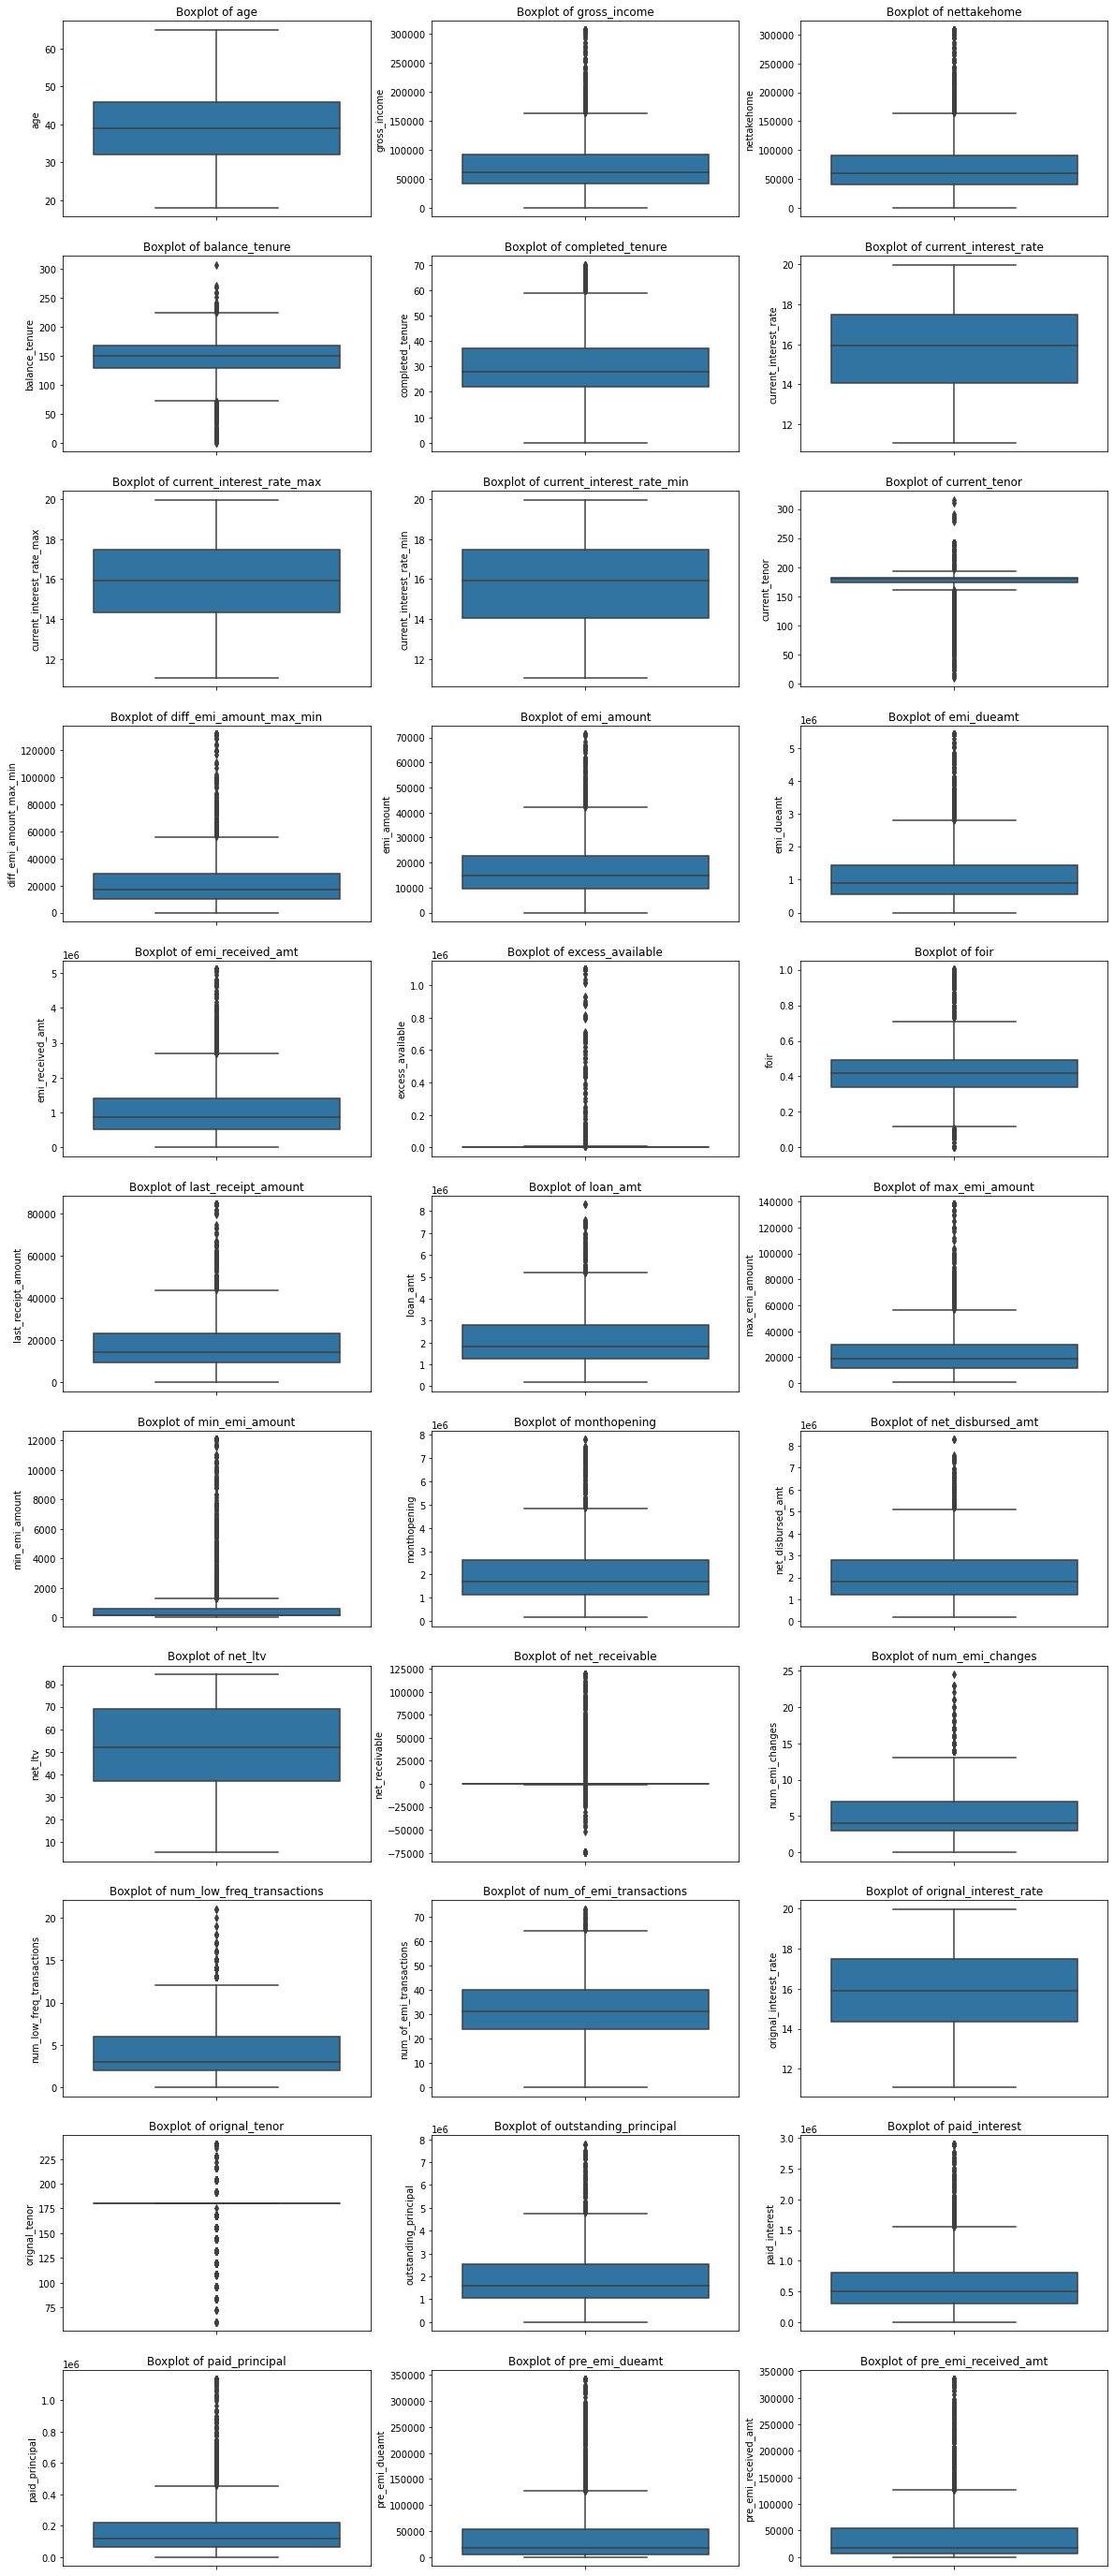

In [43]:
#Check for presence of outliers in each feature
plt.figure(figsize = (20,50))
feature_list = num_var.columns
for i in range(len(feature_list)):
    plt.subplot(11, 3, i + 1)
    sns.boxplot(y = num_var[feature_list[i]], data = num_var)
    plt.title('Boxplot of {}'.format(feature_list[i]))

## PCA

**It is necessary to perform scaling before we perform the PCA, however, we will move ahead and proceed with Z Score Scaling**

In [44]:
from scipy.stats import zscore

In [45]:
num_var_z = num_var.apply(zscore)

In [46]:
round(num_var_z.describe(), 2)

,age,gross_income,nettakehome,balance_tenure,completed_tenure,current_interest_rate,current_interest_rate_max,current_interest_rate_min,current_tenor,diff_emi_amount_max_min,emi_amount,emi_dueamt,emi_received_amt,excess_available,foir,last_receipt_amount,loan_amt,max_emi_amount,min_emi_amount,monthopening,net_disbursed_amt,net_ltv,net_receivable,num_emi_changes,num_low_freq_transactions,num_of_emi_transactions,orignal_interest_rate,orignal_tenor,outstanding_principal,paid_interest,paid_principal,pre_emi_dueamt,pre_emi_received_amt
count,2319.00,2319.00,2319.00,2319.00,2319.00,2319.00,2319.00,2319.00,2319.00,2319.00,2319.00,2319.00,2319.00,2319.00,2319.00,2319.00,2319.00,2319.00,2319.00,2319.00,2319.00,2319.00,2319.00,2319.00,2319.00,2319.00,2319.00,2319.00,2319.00,2319.00,2319.00,2319.00,2319.00
mean,-0.00,-0.00,0.00,0.00,-0.00,-0.00,0.00,0.00,-0.00,0.00,-0.00,0.00,-0.00,0.00,-0.00,0.00,-0.00,-0.00,0.00,0.00,-0.00,-0.00,0.00,0.00,-0.00,-0.00,0.00,0.00,-0.00,-0.00,0.00,0.00,0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-2.39,-1.37,-1.33,-3.25,-2.19,-2.47,-2.57,-2.46,-3.93,-0.90,-1.51,-1.20,-1.23,-0.35,-2.91,-1.15,-1.50,-0.92,-0.47,-1.47,-1.50,-2.47,-2.39,-1.41,-1.27,-2.43,-2.59,-3.37,-1.52,-1.26,-0.82,-0.64,-0.65
25%,-0.83,-0.63,-0.61,-0.39,-0.56,-0.88,-0.78,-0.87,-0.07,-0.56,-0.69,-0.64,-0.65,-0.35,-0.59,-0.60,-0.71,-0.57,-0.43,-0.70,-0.71,-0.79,-0.27,-0.62,-0.71,-0.62,-0.78,-0.02,-0.69,-0.66,-0.56,-0.57,-0.57
50%,-0.05,-0.28,-0.27,0.07,-0.11,0.12,0.07,0.12,0.10,-0.33,-0.28,-0.29,-0.28,-0.35,-0.04,-0.29,-0.29,-0.33,-0.43,-0.27,-0.29,0.03,-0.26,-0.36,-0.43,-0.09,0.08,-0.02,-0.27,-0.27,-0.35,-0.42,-0.42
75%,0.73,0.24,0.25,0.45,0.56,0.95,0.93,0.96,0.12,0.04,0.40,0.28,0.31,-0.33,0.44,0.22,0.47,0.01,-0.26,0.46,0.46,0.92,-0.26,0.43,0.40,0.59,0.94,-0.02,0.47,0.31,0.07,0.07,0.07
max,2.84,4.08,4.05,3.55,3.00,2.28,2.29,2.29,3.32,3.42,4.47,4.33,4.38,3.51,3.93,3.86,4.55,3.46,3.89,4.52,4.55,1.75,3.14,5.03,4.55,3.08,2.32,1.65,4.56,4.41,3.73,3.82,3.81


In [47]:
num_var_z.head(10)

,age,gross_income,nettakehome,balance_tenure,completed_tenure,current_interest_rate,current_interest_rate_max,current_interest_rate_min,current_tenor,diff_emi_amount_max_min,emi_amount,emi_dueamt,emi_received_amt,excess_available,foir,last_receipt_amount,loan_amt,max_emi_amount,min_emi_amount,monthopening,net_disbursed_amt,net_ltv,net_receivable,num_emi_changes,num_low_freq_transactions,num_of_emi_transactions,orignal_interest_rate,orignal_tenor,outstanding_principal,paid_interest,paid_principal,pre_emi_dueamt,pre_emi_received_amt
0,-0.050226,-0.247327,-0.221519,-0.790241,3.002543,0.951154,0.925669,0.957515,0.119073,-0.518759,-0.611217,0.482295,0.581422,-0.339409,-0.589446,-0.515760,-0.739666,-0.564415,-0.452956,-0.818419,-0.735665,-0.797169,-0.284193,1.484180,1.504908,3.082770,0.943596,-0.024200,-0.749788,0.563642,0.034768,-0.120326,-0.115829
1,1.286008,0.064628,0.085339,-0.878876,2.854256,-0.382421,0.925669,-0.374529,-0.022994,-0.454304,-0.475432,0.769880,0.891434,-0.337491,-0.042583,-0.419893,-0.515910,-0.500493,-0.439481,-0.647821,-0.511882,-0.679860,-0.333313,-0.619216,1.781926,3.082770,0.943596,-0.024200,-0.579482,0.828367,0.365048,0.385936,0.400474
2,0.172479,-0.375811,-0.347903,-2.141922,3.002543,0.951154,0.925669,0.957515,-1.325277,-0.451500,-0.462660,0.761760,0.860748,-0.332372,-0.657804,-0.410875,-0.739666,-0.498994,-0.453393,-1.033367,-0.735665,-1.033920,0.307337,2.010029,1.504908,3.082770,0.943596,-1.697774,-0.964369,0.360684,1.136260,-0.146943,-0.142973
3,0.283832,-0.056267,-0.033580,-0.812400,3.002543,0.951154,0.925669,0.957515,0.095396,0.361835,0.060230,1.745419,1.853930,-0.313349,-0.179299,-0.041702,-0.068396,0.294040,-0.436915,-0.226249,-0.064318,0.043724,1.885222,2.010029,3.444038,3.007293,0.943596,-0.024200,-0.158630,1.803185,0.613723,-0.258363,-0.256604
4,-1.386461,-0.234679,-0.209077,-0.768082,2.928400,0.951154,0.925669,0.957515,0.119073,0.162902,-0.163614,1.288238,1.399540,-0.201235,-0.384373,-0.198614,-0.292153,0.124902,-0.159788,-0.416245,-0.288100,-0.544955,1.051857,2.272954,1.504908,2.931816,0.943596,-0.024200,-0.348302,1.389498,0.382851,-0.040908,-0.034836
5,-1.497814,-0.758199,-0.724043,-0.812400,3.002543,0.951154,0.925669,0.957515,0.095396,-0.079199,-0.723054,0.271906,0.354627,-0.319656,-0.179299,-1.133560,-0.851545,-0.136783,-0.454882,-0.915211,-0.847556,-0.777440,-0.456465,2.535879,2.335963,2.931816,0.943596,-0.024200,-0.846415,0.311738,-0.071475,-0.414087,-0.415416
6,-0.050226,-0.442383,-0.413387,-0.679448,2.557682,0.951154,0.925669,0.957515,0.095396,-0.858968,-0.387373,0.722947,0.840841,-0.337343,0.025775,-0.357721,-0.515910,-0.471868,3.893717,-0.599893,-0.511882,-0.942206,-0.334512,-0.356292,0.950870,2.856340,0.943596,-0.024200,-0.531636,0.935464,0.119444,0.859791,0.883727
7,0.395185,0.795852,0.804615,-0.812400,2.780112,0.951154,0.925669,0.957515,0.024362,3.422185,1.858791,4.331564,4.382857,3.510460,0.982786,1.228127,2.281048,3.462140,-0.342926,1.902097,2.285397,-0.946472,-0.260799,-0.619216,0.673852,2.780863,0.943596,-0.024200,1.379456,4.408406,3.729655,0.415692,0.430820
8,0.506538,0.223335,-1.330163,-3.249857,1.445528,0.951154,0.925669,0.957515,-3.006406,3.422185,1.291116,2.474768,2.729271,3.510460,0.846070,0.633582,1.162265,3.462140,3.893717,0.376466,1.166485,-0.961935,-0.260799,-0.882141,0.396833,1.346802,0.943596,-0.024200,-1.522122,1.109714,3.729655,-0.501455,-0.504517
9,0.172479,-1.279775,-1.237097,-2.141922,3.002543,0.951154,0.925669,0.957515,-1.325277,-0.083452,-0.984541,-0.220002,-0.190760,-0.087500,-0.384373,-0.778803,-1.187179,-0.141761,-0.464382,-1.312684,-1.183229,-0.143971,0.120439,3.324652,4.552113,2.780863,0.943596,-1.697774,-1.243208,-0.480709,0.158602,-0.628057,-0.633629


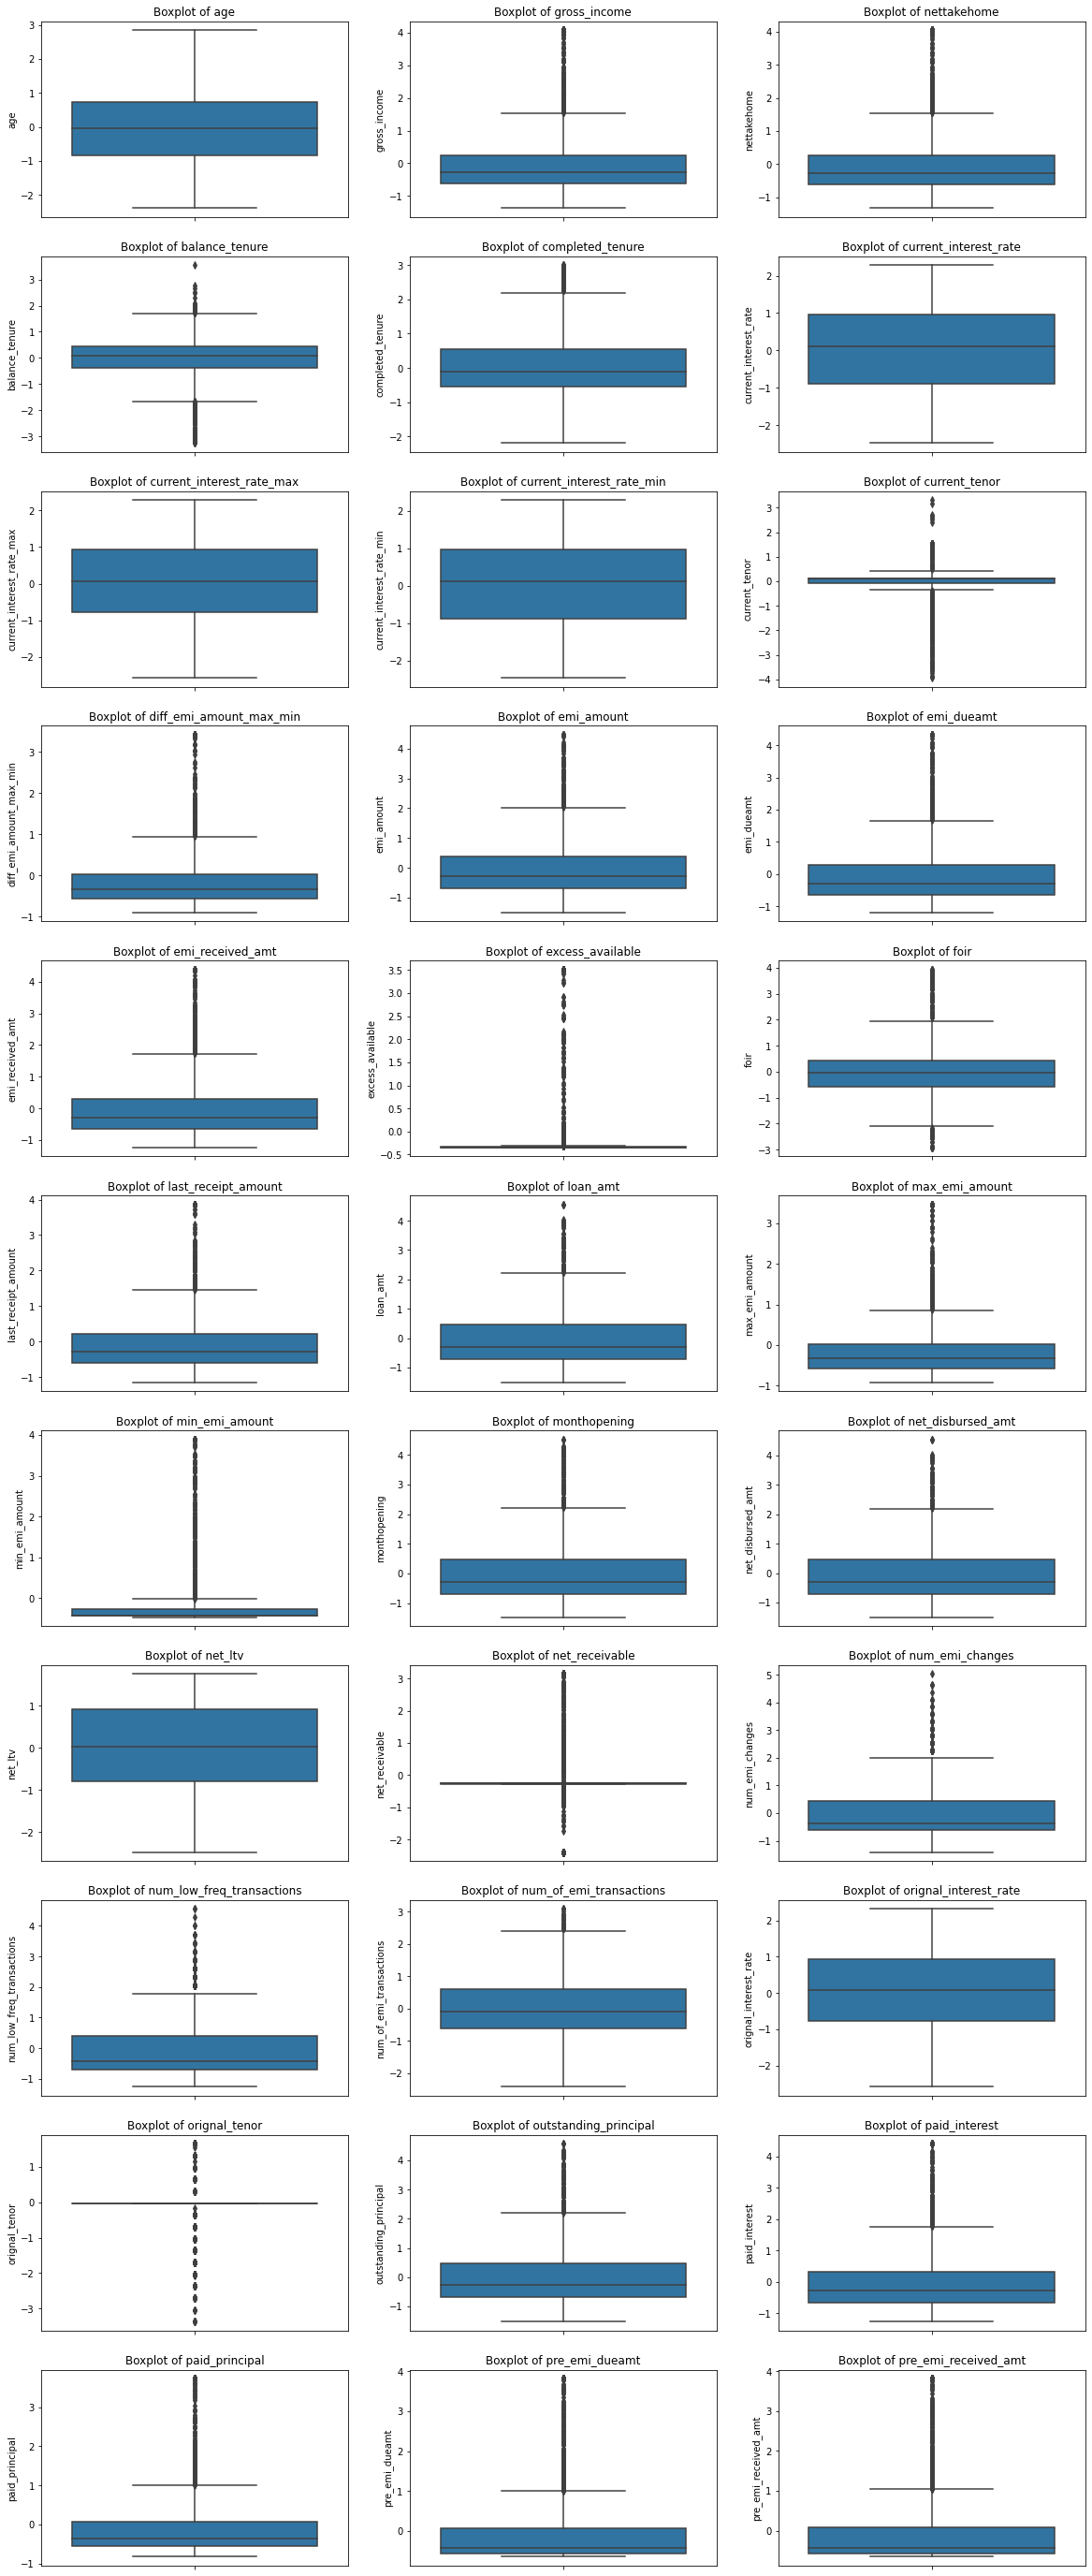

In [48]:
plt.figure(figsize = (20,50))
feature_list = num_var_z.columns
for i in range(len(feature_list)):
    plt.subplot(11, 3, i + 1)
    sns.boxplot(y = num_var_z[feature_list[i]], data = num_var_z)
    plt.title('Boxplot of {}'.format(feature_list[i]))

**We have presented the Boxplot for the Scaled Data above**

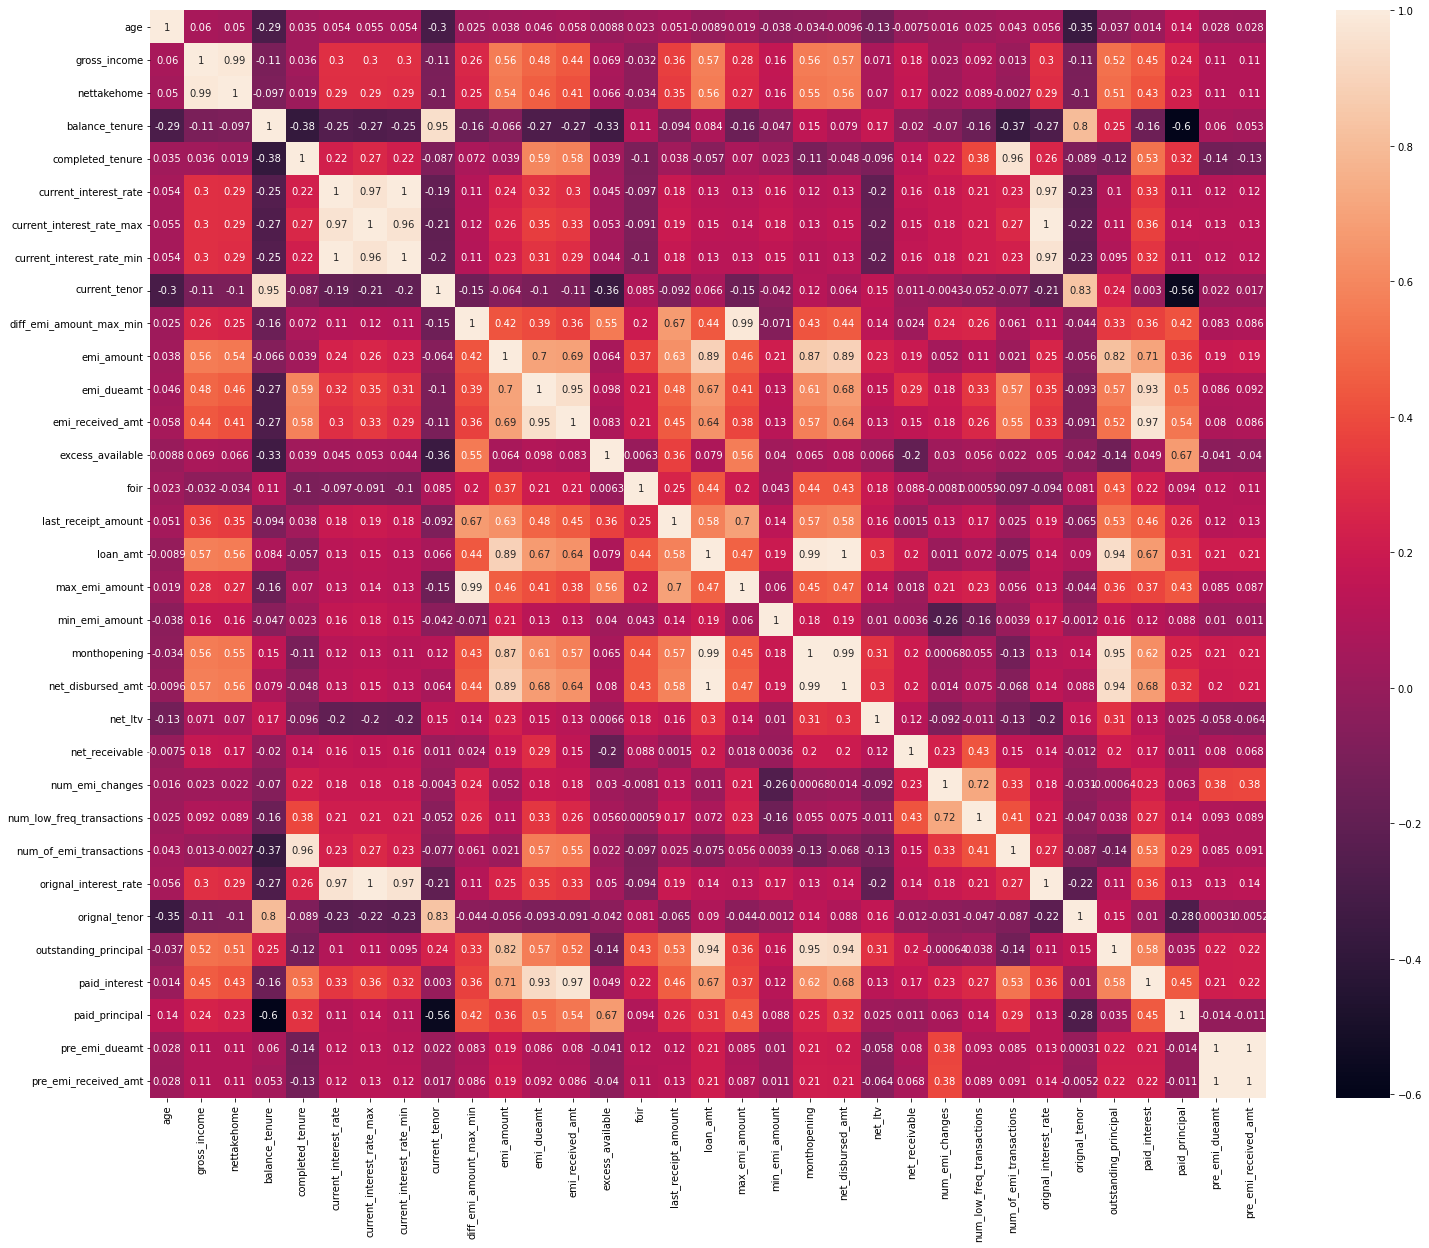

In [49]:
plt.figure(figsize = (25,20))
sns.heatmap(num_var_z.corr(), annot = True);

**Some statistical test needs to be done before proceeding for PCA, do we have a good Sample Size and do we have some good number of corelation, to perform PCA**

In [50]:
#Confirm the statistical significance of correlations
#H0: Correlations are not significant, H1: There are significant correlations
#Reject H0 if p-value < 0.05
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value,p_value=calculate_bartlett_sphericity(num_var_z)
p_value

0.0

In [51]:
#Confirm the adequacy of sample size. 
#Note: Above 0.7 is good, below 0.5 is not acceptable
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model=calculate_kmo(num_var_z)
kmo_model

0.7782349388644215

**So we can see that we have some significant number of coralations and we have a good sample size too in order to proceed with the PCA**

**KMO Test and Bartlett Test of Sphericity are statistical tests that help us to determine whether a set of data is suitable for factor analysis or not.**

In [52]:
from sklearn.decomposition import PCA

In [53]:
pca = PCA(n_components=10, random_state=765)

In [54]:
pca_transformed = pca.fit_transform(num_var_z) #The output of pca_transformed, will be converted to the dataset. This is it. 

In [55]:
pca.components_ #This returns eigen Vectors

array([[ 2.08153267e-02,  2.13745221e-01,  2.07276497e-01,
        -7.32634419e-02,  9.36506657e-02,  1.49929796e-01,
         1.57318958e-01,  1.47957181e-01, -4.97210465e-02,
         1.88576290e-01,  2.81086721e-01,  2.80370451e-01,
         2.70157556e-01,  7.10997660e-02,  9.60078083e-02,
         2.17968977e-01,  2.75466534e-01,  1.96919175e-01,
         6.47989827e-02,  2.64107536e-01,  2.76349445e-01,
         5.45691839e-02,  8.35858345e-02,  7.23849921e-02,
         9.91167507e-02,  9.21122028e-02,  1.55243297e-01,
        -3.73836310e-02,  2.40774281e-01,  2.76340123e-01,
         1.61392663e-01,  7.93382970e-02,  8.10624385e-02],
       [-9.72602493e-02,  2.70704880e-02,  3.01442253e-02,
         3.12264039e-01, -2.41559129e-01, -2.69209119e-01,
        -2.73221831e-01, -2.70830893e-01,  2.57113891e-01,
         2.89496061e-02,  1.24380319e-01, -4.73234149e-02,
        -5.01129608e-02, -7.29887102e-02,  1.71912331e-01,
         7.00829181e-02,  2.08203050e-01,  3.22165918e-

In [58]:
pca.explained_variance_ #This returns eigen Values for all 10 PCs

array([9.50499334, 5.0132416 , 3.21024246, 2.72299855, 2.29126451,
       1.89546826, 1.45392264, 1.27280869, 0.98617737, 0.82939908])

In [59]:
pca.explained_variance_ratio_ #This returns the percentage of information contained in each PC

array([0.2879059 , 0.1518509 , 0.09723813, 0.08247953, 0.06940232,
       0.05741366, 0.04403926, 0.03855333, 0.02987128, 0.02512247])

In [60]:
np.cumsum(pca.explained_variance_ratio_) #This is the cumulative sum of information contained in a PC

array([0.2879059 , 0.4397568 , 0.53699493, 0.61947445, 0.68887677,
       0.74629043, 0.79032969, 0.82888302, 0.8587543 , 0.88387677])

<AxesSubplot:>

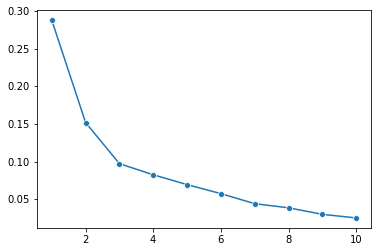

In [85]:
sns.lineplot(y = pca.explained_variance_ratio_, x = range(1,11), marker = 'o')

In [65]:
pca_df = pd.DataFrame(pca.components_.T, columns = ['PC1','PC2', 
                                           'PC3', 'PC4', 
                                           'PC5', 'PC6', 
                                           'PC7','PC8', 
                                           'PC9', 'PC10'], index = num_var_z.columns)

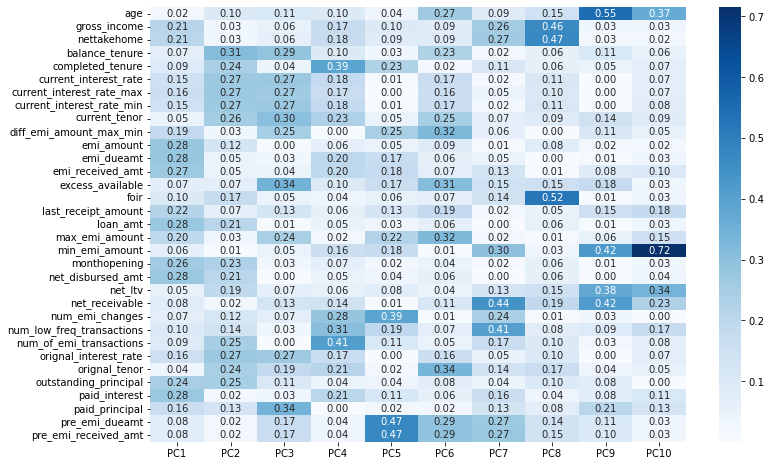

In [67]:
plt.figure(figsize = (12,8))
sns.heatmap(abs(pca_df), annot = True, cmap = 'Blues',fmt = '.2f'); The PCA has been 1 step process and this and Scree Plot is necesaary

**Here we can see that PC1, has highest number of EMI Amount, Loan Amount, EMI Due amount in its column and we can see similar for other columns as well.**

In [68]:
num_var_z

,age,gross_income,nettakehome,balance_tenure,completed_tenure,current_interest_rate,current_interest_rate_max,current_interest_rate_min,current_tenor,diff_emi_amount_max_min,emi_amount,emi_dueamt,emi_received_amt,excess_available,foir,last_receipt_amount,loan_amt,max_emi_amount,min_emi_amount,monthopening,net_disbursed_amt,net_ltv,net_receivable,num_emi_changes,num_low_freq_transactions,num_of_emi_transactions,orignal_interest_rate,orignal_tenor,outstanding_principal,paid_interest,paid_principal,pre_emi_dueamt,pre_emi_received_amt
0,-0.050226,-0.247327,-0.221519,-0.790241,3.002543,0.951154,0.925669,0.957515,0.119073,-0.518759,-0.611217,0.482295,0.581422,-0.339409,-0.589446,-0.515760,-0.739666,-0.564415,-0.452956,-0.818419,-0.735665,-0.797169,-0.284193,1.484180,1.504908,3.082770,0.943596,-0.024200,-0.749788,0.563642,0.034768,-0.120326,-0.115829
1,1.286008,0.064628,0.085339,-0.878876,2.854256,-0.382421,0.925669,-0.374529,-0.022994,-0.454304,-0.475432,0.769880,0.891434,-0.337491,-0.042583,-0.419893,-0.515910,-0.500493,-0.439481,-0.647821,-0.511882,-0.679860,-0.333313,-0.619216,1.781926,3.082770,0.943596,-0.024200,-0.579482,0.828367,0.365048,0.385936,0.400474
2,0.172479,-0.375811,-0.347903,-2.141922,3.002543,0.951154,0.925669,0.957515,-1.325277,-0.451500,-0.462660,0.761760,0.860748,-0.332372,-0.657804,-0.410875,-0.739666,-0.498994,-0.453393,-1.033367,-0.735665,-1.033920,0.307337,2.010029,1.504908,3.082770,0.943596,-1.697774,-0.964369,0.360684,1.136260,-0.146943,-0.142973
3,0.283832,-0.056267,-0.033580,-0.812400,3.002543,0.951154,0.925669,0.957515,0.095396,0.361835,0.060230,1.745419,1.853930,-0.313349,-0.179299,-0.041702,-0.068396,0.294040,-0.436915,-0.226249,-0.064318,0.043724,1.885222,2.010029,3.444038,3.007293,0.943596,-0.024200,-0.158630,1.803185,0.613723,-0.258363,-0.256604
4,-1.386461,-0.234679,-0.209077,-0.768082,2.928400,0.951154,0.925669,0.957515,0.119073,0.162902,-0.163614,1.288238,1.399540,-0.201235,-0.384373,-0.198614,-0.292153,0.124902,-0.159788,-0.416245,-0.288100,-0.544955,1.051857,2.272954,1.504908,2.931816,0.943596,-0.024200,-0.348302,1.389498,0.382851,-0.040908,-0.034836
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2314,2.399537,-0.442383,-0.413387,-1.853859,-0.630492,0.251027,0.210095,0.258192,-2.177680,-0.573597,-0.666926,-0.727986,-0.723238,-0.346354,-0.999594,-0.555092,-1.019362,-0.615475,-0.426800,-1.057347,-1.015393,1.110170,-0.261366,-0.619216,-0.711241,-0.766551,0.220855,-2.701918,-0.988308,-0.924306,-0.246484,-0.612991,-0.618265
2315,-0.606991,-1.374387,-1.330163,2.068232,-2.187507,-0.715815,-0.778079,-0.707540,1.516068,-0.094863,-0.809012,-1.201764,-1.233962,-0.346424,3.375313,-0.655409,-0.517862,-0.149548,-0.426800,-0.589877,-0.676637,0.810498,3.136914,0.432482,0.950870,-1.068458,-0.777217,1.649373,-0.521636,-1.008962,-0.818670,3.481522,1.907960
2316,-1.831873,-0.722006,-0.688442,0.273377,-0.630492,-0.049027,-0.096579,-0.041518,0.095396,-0.589992,-0.708938,-0.751696,-0.748797,-0.346424,-0.316015,-0.584754,-0.773230,-0.631432,-0.426800,-0.727445,-0.769232,1.498356,-0.260799,-0.619216,-0.434223,-0.766551,-0.088892,-0.024200,-0.658970,-0.774965,-0.612098,-0.595276,-0.600198
2317,1.397361,-0.016324,0.005710,0.273377,-0.630492,-0.382421,-0.437329,-0.374529,0.095396,-0.101421,-0.481314,-0.624088,-0.670457,-0.346284,0.777712,-0.424045,-0.499128,-0.155931,-0.426800,-0.448884,-0.495099,1.497290,1.272096,-0.356292,0.119814,-0.766551,-0.433054,-0.024200,-0.380885,-0.703581,-0.564056,-0.592770,-0.597642


In [69]:
for i in pca_df.columns:
    pc_score = np.dot(pca_df[i], num_var_z.iloc[0])
    print(round(pc_score, 6), end = ' ')

0.311659 -4.25174 -1.106245 -3.235426 -0.627428 0.231345 0.27349 0.434022 -0.570655 0.001564 

,age,gross_income,nettakehome,balance_tenure,completed_tenure,current_interest_rate,current_interest_rate_max,current_interest_rate_min,current_tenor,diff_emi_amount_max_min,emi_amount,emi_dueamt,emi_received_amt,excess_available,foir,last_receipt_amount,loan_amt,max_emi_amount,min_emi_amount,monthopening,net_disbursed_amt,net_ltv,net_receivable,num_emi_changes,num_low_freq_transactions,num_of_emi_transactions,orignal_interest_rate,orignal_tenor,outstanding_principal,paid_interest,paid_principal,pre_emi_dueamt,pre_emi_received_amt
0,-0.050226,-0.247327,-0.221519,-0.790241,3.002543,0.951154,0.925669,0.957515,0.119073,-0.518759,-0.611217,0.482295,0.581422,-0.339409,-0.589446,-0.515760,-0.739666,-0.564415,-0.452956,-0.818419,-0.735665,-0.797169,-0.284193,1.484180,1.504908,3.082770,0.943596,-0.024200,-0.749788,0.563642,0.034768,-0.120326,-0.115829
1,1.286008,0.064628,0.085339,-0.878876,2.854256,-0.382421,0.925669,-0.374529,-0.022994,-0.454304,-0.475432,0.769880,0.891434,-0.337491,-0.042583,-0.419893,-0.515910,-0.500493,-0.439481,-0.647821,-0.511882,-0.679860,-0.333313,-0.619216,1.781926,3.082770,0.943596,-0.024200,-0.579482,0.828367,0.365048,0.385936,0.400474
2,0.172479,-0.375811,-0.347903,-2.141922,3.002543,0.951154,0.925669,0.957515,-1.325277,-0.451500,-0.462660,0.761760,0.860748,-0.332372,-0.657804,-0.410875,-0.739666,-0.498994,-0.453393,-1.033367,-0.735665,-1.033920,0.307337,2.010029,1.504908,3.082770,0.943596,-1.697774,-0.964369,0.360684,1.136260,-0.146943,-0.142973
3,0.283832,-0.056267,-0.033580,-0.812400,3.002543,0.951154,0.925669,0.957515,0.095396,0.361835,0.060230,1.745419,1.853930,-0.313349,-0.179299,-0.041702,-0.068396,0.294040,-0.436915,-0.226249,-0.064318,0.043724,1.885222,2.010029,3.444038,3.007293,0.943596,-0.024200,-0.158630,1.803185,0.613723,-0.258363,-0.256604
4,-1.386461,-0.234679,-0.209077,-0.768082,2.928400,0.951154,0.925669,0.957515,0.119073,0.162902,-0.163614,1.288238,1.399540,-0.201235,-0.384373,-0.198614,-0.292153,0.124902,-0.159788,-0.416245,-0.288100,-0.544955,1.051857,2.272954,1.504908,2.931816,0.943596,-0.024200,-0.348302,1.389498,0.382851,-0.040908,-0.034836
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2314,2.399537,-0.442383,-0.413387,-1.853859,-0.630492,0.251027,0.210095,0.258192,-2.177680,-0.573597,-0.666926,-0.727986,-0.723238,-0.346354,-0.999594,-0.555092,-1.019362,-0.615475,-0.426800,-1.057347,-1.015393,1.110170,-0.261366,-0.619216,-0.711241,-0.766551,0.220855,-2.701918,-0.988308,-0.924306,-0.246484,-0.612991,-0.618265
2315,-0.606991,-1.374387,-1.330163,2.068232,-2.187507,-0.715815,-0.778079,-0.707540,1.516068,-0.094863,-0.809012,-1.201764,-1.233962,-0.346424,3.375313,-0.655409,-0.517862,-0.149548,-0.426800,-0.589877,-0.676637,0.810498,3.136914,0.432482,0.950870,-1.068458,-0.777217,1.649373,-0.521636,-1.008962,-0.818670,3.481522,1.907960
2316,-1.831873,-0.722006,-0.688442,0.273377,-0.630492,-0.049027,-0.096579,-0.041518,0.095396,-0.589992,-0.708938,-0.751696,-0.748797,-0.346424,-0.316015,-0.584754,-0.773230,-0.631432,-0.426800,-0.727445,-0.769232,1.498356,-0.260799,-0.619216,-0.434223,-0.766551,-0.088892,-0.024200,-0.658970,-0.774965,-0.612098,-0.595276,-0.600198
2317,1.397361,-0.016324,0.005710,0.273377,-0.630492,-0.382421,-0.437329,-0.374529,0.095396,-0.101421,-0.481314,-0.624088,-0.670457,-0.346284,0.777712,-0.424045,-0.499128,-0.155931,-0.426800,-0.448884,-0.495099,1.497290,1.272096,-0.356292,0.119814,-0.766551,-0.433054,-0.024200,-0.380885,-0.703581,-0.564056,-0.592770,-0.597642


In [74]:
final_pca_data = pd.DataFrame(pca_transformed, columns = [['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J']])

In [79]:
final_pca_data

,A,B,C,D,E,F,G,H,I,J
0,0.311659,-4.251740,-1.106245,-3.235426,-0.627429,0.231345,0.273490,0.434022,-0.570656,0.001565
1,0.669617,-3.200519,-0.043122,-3.052667,-1.016553,-1.068400,0.809471,0.571361,-1.079489,0.558397
2,0.817481,-5.851116,0.433785,-2.725427,-0.376617,-1.069060,-0.254601,-0.154933,-0.056367,-0.118102
3,3.301880,-3.910252,-0.664484,-4.747962,-0.463813,0.272865,-1.458396,-0.539867,0.235093,0.526284
4,2.151016,-3.742969,-0.986130,-3.998641,-0.387385,0.630878,-0.033627,0.179016,0.684482,-0.162990
...,...,...,...,...,...,...,...,...,...,...
2314,-2.406391,-2.707308,1.639094,2.589235,-0.408473,-1.950498,-1.169571,-1.204382,-0.573813,-0.494198
2315,-2.604274,3.226568,-2.238861,-1.533964,4.383863,-0.581128,-0.089402,-2.264850,2.332398,0.627276
2316,-2.802249,0.372669,-0.419971,0.471394,-0.587687,0.893837,-0.229035,-0.465519,1.370088,-1.574290
2317,-1.678178,0.813636,0.269523,0.316170,-0.169661,-0.286454,-1.758588,-1.140672,0.105330,0.307370


In [86]:
final_data = pd.concat([cat_var, pd.DataFrame(data=final_pca_data)], axis=1)

In [87]:
final_data # This is our final output and it can be further used for EDA, Analytics

,gender,marital_status,qualification,city,"(A,)","(B,)","(C,)","(D,)","(E,)","(F,)","(G,)","(H,)","(I,)","(J,)"
0,F,M,UG,MADURAI,0.311659,-4.251740,-1.106245,-3.235426,-0.627429,0.231345,0.273490,0.434022,-0.570656,0.001565
1,M,M,GRAD,MADURAI,0.669617,-3.200519,-0.043122,-3.052667,-1.016553,-1.068400,0.809471,0.571361,-1.079489,0.558397
2,M,M,UG,MADURAI,0.817481,-5.851116,0.433785,-2.725427,-0.376617,-1.069060,-0.254601,-0.154933,-0.056367,-0.118102
3,M,M,UG,MADURAI,3.301880,-3.910252,-0.664484,-4.747962,-0.463813,0.272865,-1.458396,-0.539867,0.235093,0.526284
4,M,S,GRAD,MADURAI,2.151016,-3.742969,-0.986130,-3.998641,-0.387385,0.630878,-0.033627,0.179016,0.684482,-0.162990
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2314,M,M,UG,MUMBAI,-2.406391,-2.707308,1.639094,2.589235,-0.408473,-1.950498,-1.169571,-1.204382,-0.573813,-0.494198
2315,M,M,UG,MUMBAI,-2.604274,3.226568,-2.238861,-1.533964,4.383863,-0.581128,-0.089402,-2.264850,2.332398,0.627276
2316,M,M,UG,SURAT,-2.802249,0.372669,-0.419971,0.471394,-0.587687,0.893837,-0.229035,-0.465519,1.370088,-1.574290
2317,M,M,UG,AHMEDABAD,-1.678178,0.813636,0.269523,0.316170,-0.169661,-0.286454,-1.758588,-1.140672,0.105330,0.307370


**We have here merged the PCA Data with the object data, and now we can proceed further with our logistic regression methods or as desired.**

<AxesSubplot:xlabel='None', ylabel='None'>

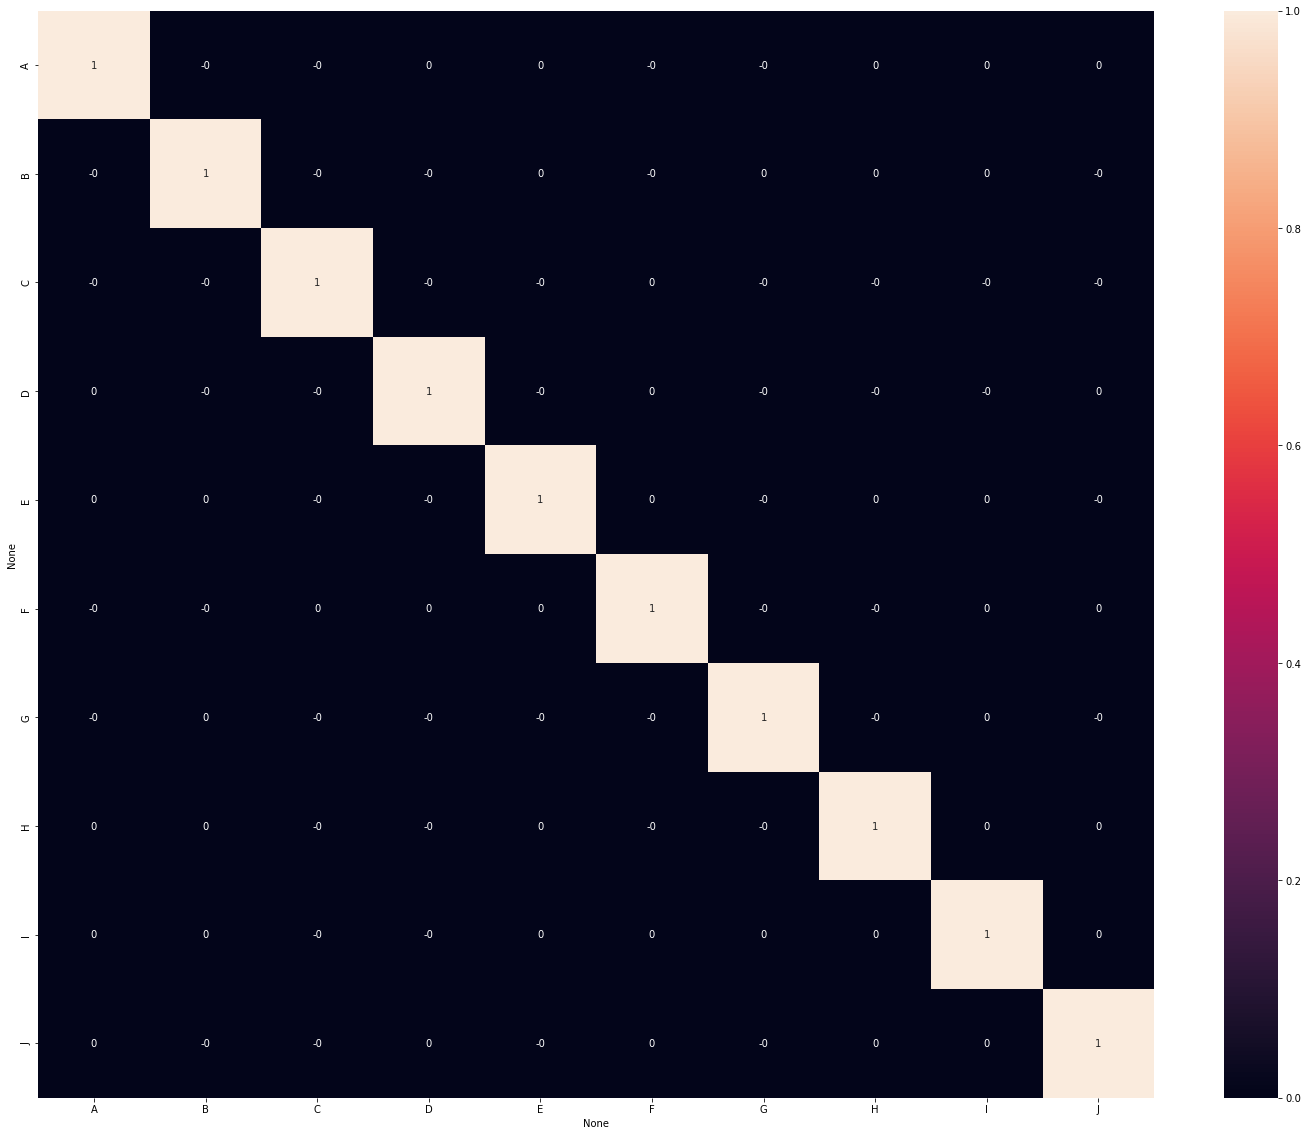

In [92]:
plt.figure(figsize = (25,20))
sns.heatmap(round(final_pca_data.corr(), 2), annot = True)

PCA also help us with Multi colinearity in the data

**Learnings while working on this Project:**

1. The data should certainly be scaled before we proceed for analysis.
2. We should deep dive into data nd ensure that the data is clean. 
3. I was performing outlier removal with one of the variable and 'orignal_tenor', where I capped the values 25th opercentile and 75th percentile, and I proceeded further. Later when I scaled the data, it seems good and then I went ahead with corelation heatmap where I was getting a blank row in the middle of the heatmap and I got curious and I checked my scale data and it was showing NaN insted of a value, went up and checked the data I after the outlier removal and capping, so I realised that the data values are all capped as 180, so that didn't seem significant to me. So I thought I should not remove the outlier, for this particular column, and proceed with other. 
4. I have also realied that while describing the data, there are sevral outliers, but if we cap as per the standard 25-75 rule we might be changing the actual data, so I consulted a mentor about this and he suggested me to use 10th percentile and 90th percentile as a capping value. 

### Please feel free to ask me any questions related to the Project and I am keen to get feedback about the same as well and I wish to lern every day from diffrent people.*